# Section 1: Business Understanding 1

We will be examining data about educational outcomes in the state of North Carolina. We decided to work with education data because educational outcomes are a very strong leading predictor for economic growth. This relationship has been borne out through extensive amounts of research by academic institutions and government bodies alike. In a study published by the World Bank in 2007, “The Role of Education Quality in Economic Growth,” Eric A. Hanushek and Ludger Wößmann found that for each additional year of education a country's citizens receive, there is a 0.58% increase in long-term GDP growth. Below we can see a clear positive relationship between years of education and economic growth.

<center>
    <img src='images/yearsVsgrowth.png'>
</center>

While the number of years of education is a helpful barometer, many developed countries have roughly the same amount of compulsory education. Hanushek and Wößmann found that standardized test scores were an even better predictor of economic prosperity. In fact, they found the pattern to be persistent across low- and high-income countries.

|| |
|:---|:---|
|![alt](images/belowmeantestscores.png) | ![alt](images/abovemeantestscores.png)|

The particular dataset we will be using is from [The Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools freely available on Github.com](https://github.com/jakemdrew/EducationDataNC). This data repository contains a very large amount of information on public elementary, middle, and high schools from North Carolina, United States. The speicific dataset from this repository we will be primarily working with is the 2017 public high schools "Machine Learning Dataset" as available [here](https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Machine%20Learning%20Datasets/PublicHighSchools2017_ML.csv). This dataset contains hundreds of datapoints about hundreds of public high schools across North Carolina. We will fully examine all variables in a later section.

Supported by Hanushek and Wößmann's findings that standardized test scores are a powerful indicator of economic prosperity, we will seek to understand the relationship between the (many) variables in the Belk dataset and SAT scores. The dataset contains a variable that indicates the average numeric SAT score for each school. We will seek to classify schools into over and underperformers, which will allow government and non-profit organizations to focus their efforts on schools who need help, and learn from those who do not. We will derive this binary indicator variable using a threshold score of 1080, with schools that have an average numeric SAT score above that considered overperformers (Y=1), and underperformers otherwise. The cutoff of 1080 was selected because it was the average score across North Carolina high schoolers. Information on state-by-state and national SAT performance is released by the College Board annually, available at https://reports.collegeboard.org/.

We will seek to measure the quality and usefulness of our analyses from two perspectives. First, we will track the quality of our classifier, that is, monitor precision, accuracy and recall. This will serve to validate that the relationships identified in the data are reliable. While all three of those metrics provide insight, we will be focusing more on precision than the others. False positives in our model are of great concern. A false positive would mean indicating a school is likely to outperform when it actually is not. If this model were being used to help direct funds to in-need schools, a false positive would result in a school who really needs help being passed over for intervention. Conversely, a false negative, where a school is labeled as non-outperform when it actually is doing well doesn't have as high a cost. The school won't receive intervention, but they don't need it anyway. 

Precision is defined as $\frac{TP}{TP+FP}$ where TP are true positives and FP are false positives. Looking at this formula, you can tell that precision optimizes for reducing false positives. As your FP value goes to 0, the precision score will approach 1 because the numerator and denomitor are equal.

Second, we will seek a parsimonious model over a pure black-box because the ultimate value of this analysis is understanding what factors lead to higher performing schools, and redirecting resources to support those schools in need. An algorithm with 100% predictive accuracy but 0% interpretability simply identifies a school as likely to perform poorly on the SAT, which doesn't actually help the students at that school.

We will seek to measure the quality and usefulness of our clustering analysis from two criteria using three measures of validity. The analysis will look at the cohesion of the school clusterings to evaluate how closely related objects are in a cluster.  This project will also evaluate the separation which describes how distinct each of the clusters is from the other clusters.  To evaluate the validity of these critera we will perform visual inspections and look at both the silhouette coefficient and distortion score.  Visual inspections can provide some confirmation that clusters have adequately been defined but do not give a great quantifiable indicator of either cohesion or separation.  Silhouette coefficients attempt to quantify both cohesion and separation into a single number.  The closer to 1 the silhouette coefficient, the better the clustering.  Distortion Score measures primarily the cohesion of clusters since it looks at the sum of square errors for the distance of a point to the centroid.

# Section 2: Data Understanding 1

## Data Meaning
The North Carolina Educational dataset pertaining to high schools consists of 403 attributes describing a broad range of data points from school overview, attendance and enrollment, student performance, safety and environment, and access to technology.  This section will describe the meaning and type of data included in this project.  For each attribute in the dataset this section will define the attribute and state the units for a measurement of scale and the type of values used.

### School Profile
The school profile section contains data pertaining to the attendance, demographics, and descriptive or administrative activities that take place at the school.

#### Overview
The overview section of the school profile data covers the descriptive attributes of the school.  Most of these are one-hot encoded variables with zeroes expressing the absence of the attribute in question and ones indicating the presence of the attribute.  This section contains 39 attributes, almost all of which are nominal attributes with binary values.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :----: | :---------: | 
| unit_code | Object | NA | Code to identify School/LEA/State |
| calendar_type_txt_Regular School, Year-Round Calendar |  Nominal | Binary | Whether a school conforms to normal calendar (0) or Year Round Calendar (1) |
| esea_status_p | Nominal | Binary | Indicates a priority school under the Elementary and Secondary School Act |
| State Gap Compared_Y | Nominal | Binary | Whether the school was analyzed for performance gaps |
| grad_project_status_Y | Nominal | Binary | Projected graduation status |
| SBE District_Northeast | Nominal | Binary | Indicate presence in State Board of Education Northeast District |
| SBE District_Northwest | Nominal | Binary | Indicates presence in State Board of Education Northwest District |
| SBE District_Piedmont-Triad | Nominal | Binary | Indicates presence in State Board of Education Piedmont-Triad District |
| SBE District_Sandhills | Nominal | Binary | Indicates presence in State Board of Education Sandhills District |
| SBE District_Southeast | Nominal | Binary | Indicates presence in State Board of Education Southeast District |
| SBE District_Southwest | Nominal | Binary | Indicates presence in State Board of Education Southwest District |
| SBE District_Western | Nominal | Binary | Indicates presence in State Board of Education Western District |
| grade_range_cd_11-12 | Nominal | Binary | Grades present at school |
| grade_range_cd_11-13 | Nominal | Binary | Grades present at school |
| grade_range_cd_3-12 | Nominal | Binary | Grades present at school |
| grade_range_cd_6-12 | Nominal | Binary | Grades present at school |
| grade_range_cd_6-13 | Nominal | Binary | Grades present at school |
| grade_range_cd_7-12 | Nominal | Binary | Grades present at school |
| grade_range_cd_7-13 | Nominal | Binary | Grades present at school |
| grade_range_cd_8-12 | Nominal | Binary | Grades present at school |
| grade_range_cd_9-11 | Nominal | Binary | Grades present at school |
| grade_range_cd_9-12 | Nominal | Binary | Grades present at school |
| grade_range_cd_9-13 | Nominal | Binary | Grades present at school |
| grade_range_cd_9-9 | Nominal | Binary | Grades present at school |
| grade_range_cd_PK-12 | Nominal | Binary | Grades present at school |
| grade_range_cd_PK-13 | Nominal | Binary | Grades present at school |
| SRC_devices_sent_home_Yes | Nominal | Binary | Are school report cards sent home |
| SRC_Grades_Devices_Sent_Home_10:11:12 | Nominal | Binary | Grades sent report cards |
| SRC_Grades_Devices_Sent_Home_10:11:12:13 | Nominal | Binary | Grades sent report cards |
| SRC_Grades_Devices_Sent_Home_6:07:08 | Nominal | Binary | Grades sent report cards |
| SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12 | Nominal | Binary | Grades sent report cards |
| SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12:13 | Nominal | Binary | Grades sent report cards |
| SRC_Grades_Devices_Sent_Home_8:9:10:11:12:13 | Nominal | Binary | Grades sent report cards |
| SRC_Grades_Devices_Sent_Home_9:10 | Nominal | Binary | Grades sent report cards |
| SRC_Grades_Devices_Sent_Home_9:10:11 | Nominal | Binary | Grades sent report cards |
| SRC_Grades_Devices_Sent_Home_9:10:11:12 | Nominal | Binary | Grades sent report cards |
| SRC_Grades_Devices_Sent_Home_9:10:11:12:13 | Nominal | Binary | Grades sent report cards |
| SRC_Grades_Devices_Sent_Home_9:10:12 | Nominal | Binary | Grades sent report cards |

#### Attendance
This section covers the overall attendance and number of students.  Enrollment is expressed as numeric counts while the daily attendance is given in percentages.  A total of 6 continuous attributes describe attendance in this dataset.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| student_num | Ratio | NA | Student Population at school |
| lea_avg_student_num | Ratio | NA | Average student population in LEA |
| st_avg_student_num | Ratio | NA |  Average student population in state |
| avg_daily_attend_pct | Ratio | NA | Average percent of daily attendance at school |
| lea_avg_daily_attend_pct | Ratio | NA |Average percent of daily attendance at LEA |
| st_avg_daily_attend_pct | Ratio | NA |Average percent of daily attendance at state |


#### Demographics
This section covers the racial composition of the school.  Each race is shown both in aggregate as well as male/female breakouts.  Empty columns have been removed and explain why some race/sex combinations are not present.  Twenty-five continuous attributes cover the demographic composition of each school in the machine learning dataset.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| ALL_All Students (Total or Subtotal_ENROLL_sch_pct | Ratio | NA | Percentage of students enrolled |
| ECODIS_Economically Disadvantaged_ENROLL_sch_pct | Ratio | NA | Percent of Economically Disadvantaged students enrolled at school |
| F_Female_ENROLL_sch_pct | Ratio | NA | percentage of female students enrolled |
| M_Male_ENROLL_sch_pct | Ratio | NA | percentage of male students enrolled |
| MB_Black_ENROLL_sch_pct | Ratio | NA | percentage of black students enrolled |
| MW_White_ENROLL_sch_pct | Ratio | NA | percentage of white students enrolled |
| AsianFemalePct | Ratio | NA | Percent of Asian females in school population |
| AsianMalePct | Ratio | NA | Percent of Asian males in school population |
| BlackFemalePct | Ratio | NA | Percent of Black females in school population |
| BlackMalePct | Ratio | NA | Percent of Black males in school population |
| BlackPct | Ratio | NA | Percent of Black population in school |
| HispanicFemalePct | Ratio | NA | Percent of Hispanic females in school population |
| HispanicMalePct | Ratio | NA | Percent of Hispanic males in school population |
| HispanicPct | Ratio | NA | Percent of Black population in school |
| IndianFemalePct | Ratio | NA | Percent of Indian females in school population |
| MinorityFemalePct | Ratio | NA | Percent of Minority females in school population |
| MinorityMalePct | Ratio | NA | Percent of Minority males in school population |
| MinorityPct | Ratio | NA | Percent of Minority population in school |
| PacificIslandFemalePct | Ratio | NA | Percent of Pacific Islander females in school population |
| PacificIslandMalePct | Ratio | NA | Percent of Pacific Islander males in school population |
| PacificIslandPct | Ratio | NA | Percent of Pacific Islander population in school |
| TwoOrMoreFemalePct | Ratio | NA | Percent of females identifying as two ore more races of the school population |
| TwoOrMoreMalePct |Ratio | NA | Percent of males identifying as two ore more races of the school population |
| TwoOrMorePct | Ratio | NA | Percent of those with two or more races population in school |
| pct_eds | Ratio | NA | Percent of economically disadvantaged students |

### Financial Profile
The financial profile includes data that shows where funding comes from at the district (LEA) level and how the district spends the funds.  Note that all of these data fall at the district level.  Only 8 attributes cover the financial aspect of each school making it one of the smaller attribute categories of this dataset.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| lea_total_expense_num | Ratio | Dollars | Total expenditure per pupil in LEA |
| lea_salary_expense_pct | Ratio | NA | Percentage of funds used to pay salaries in LEA |
| lea_services_expense_pct | Ratio | NA | Percentage of funds used to buy services in LEA |
| lea_supplies_expense_pct | Ratio | NA | Percentage of funds used to buy supplies in LEA |
| lea_instruct_equip_exp_pct | Ratio | NA | Percentage of funds used to buy instructional equipment in LEA |
| lea_federal_perpupil_num | Ratio | Dollars | Federal expenditure per pupil in LEA |
| lea_local_perpupil_num | Ratio | Dollars | Local expenditure per pupil in LEA |
| lea_state_perpupil_num | Ratio | Dollars | State expenditure per pupil in LEA |

### Resource Profile
The resource profiles contain data that describes students access to educational media and resources such as books, internet, and electronic devices.  The Bring Your Own Device and 1 to 1 access fields are all one-hot encoded fields while the rest of the data contains simple counts or percent data.  Thirty-eight attributes describe resource availability across the North Carolina public high schools.  Of these thirty-eight, twenty-eight are nominal while ten are continuous.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| digital_media_pct | Ratio | NA | Percentage of students with access to digital media at school |
| avg_age_media_collection | Ordinal | Year | Average age of media collection at school |
| books_per_student | Ratio | NA | Number of books per student at school |
| lea_books_per_student | Ratio | NA | Number of books per student at LEA |
| wap_num | Ratio | NA | Number of WAP at school |
| wap_per_classroom | Ratio | NA | Number of Wireless Access Points per classroom at LEA |
| lea_wap_num | Ratio | NA | Number of WAP at LEA |
| lea_wap_per_classroom | Ratio | NA | Number of WAP per classroom at LEA |
| stud_internet_comp_num | Ratio | NA | Number of Students per internet device in school |
| lea_stud_internet_comp_num | Ratio | NA | Number of students per internet device in LEA |
| Byod_Yes | Nominal | Binary | Is the school a Bring Your Own Device School? |
| grades_BYOD_11:12 | Nominal | Binary | Grade levels that are BYOD |
| grades_BYOD_11:12:13 | Nominal | Binary | Grade levels that are BYOD |
| grades_BYOD_12 | Nominal | Binary | Grade levels that are BYOD |
| grades_BYOD_6:7:8:9:10:11:12 | Nominal | Binary | Grade levels that are BYOD |
| grades_BYOD_6:7:8:9:10:11:12:13 |  Nominal | Binary | Grade levels that are BYOD |
| grades_BYOD_8:9:10:11:12 | Nominal | Binary | Grade levels that are BYOD |
| grades_BYOD_9 |  Nominal | Binary | Grade levels that are BYOD |
| grades_BYOD_9:10:11 |  Nominal | Binary | Grade levels that are BYOD |
| grades_BYOD_9:10:11:12 |  Nominal | Binary | Grade levels that are BYOD |
| grades_BYOD_9:10:11:12:13 | Nominal | Binary | Grade levels that are BYOD |
| grades_BYOD_9:11:12 |  Nominal | Binary | Grade levels that are BYOD |
| grades_BYOD_PK:9:10:11:12 | Nominal | Binary | Grade levels that are BYOD |
| _1_to_1_access_Yes | Nominal | Binary |  Does the school provide technology devices? |
| grades_1_to_1_access_10:11:12 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_10:11:12:13 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_11 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_11:12 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_11:12:13 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_6:07:08 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_6:7:8:9:10:11:12 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_6:7:8:9:10:11:12:13 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_9 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_9:10 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_9:10:11 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_9:10:11:12 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_9:10:11:12:13 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |
| grades_1_to_1_access_9:11:12:13 | Nominal | Binary | Grade levels that have 1:1 student/technology ratio |


### Educator Profile
The primary purpose of the educator profile data is to examine the fitness of the educators responsible for the students learning activities.  This covers the teachers education and professional licensing, their relevant work experience, as well as whether they meet or exceed certain state standards.

#### Education & Licensing
Education and licensing data looks at the percentage of teachers professionally licensed as well as the advanced education levels of teachers.  Licensing comes in two forms with the standard teacher's license and then the National Board Certification which is a more prestigious accomplishment.  Education focuses solely on the percent of teachers with advanced degrees (masters degree or higher).  Six continuous attributes cover the important facets of educator education and licensing.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| flicensed_teach_pct | Ratio | NA | Percentage of teachers with a license |
| advance_dgr_pct | Ratio | NA | Percent of teachers with an advanced degree |
| nbpts_num | Ratio | NA | Percent of teachers with National Board Certification |
| lea_flicensed_teach_pct | Ratio | NA | Percentage of teachers with a license within the LEA |
| lea_nbpts_num | Ratio | NA |  Percent of teachers with National Board Certification within the LEA |
| lea_advance_dgr_pct | Ratio | NA | Percent of teachers with an advanced degree within the LEA |

#### Experience
The educator experience section contains data that shows comparative experience levels by putting the teachers and principals into general bins of new, journeyman, or experienced levels based on years of experience.  This also covers teacher turnover rates in the 1st year which may negatively impact students.  Thirteen continuous attributes describe the amount of experience held by North Carolina educators.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| tchyrs_0thru3_pct | Ratio | NA | Percentage of teachers at school with 0-3 years experience |
| tchyrs_4thru10_pct | Ratio | NA | Percentage of teachers at school with 4-10 years experience |
| tchyrs_11plus_pct | Ratio | NA | Percentage of teachers at school with 11+ years experience |
| lea_tchyrs_0thru3_pct | Ratio | NA | Percentage of teachers in LEA with 0-3 years experience |
| lea_tchyrs_4thru10_pct | Ratio | NA | Percentage of teachers in LEA with 4-10 years experience |
| lea_tchyrs_11plus_pct | Ratio | NA | Percentage of teachers in LEA with 11+ years experience |
| 0-3 Years_LEA_Exp_Pct_Prin | Ratio | NA | Percentage of principles in LEA with 0-3 years experience |
| 10+ Years_LEA_Exp_Pct_Prin | Ratio | NA | Percentage of principles in LEA with 10+ years experience |
| 4-10 Years_LEA_Exp_Pct_Prin | Ratio | NA | Percentage of principles in LEA with 4-10 years experience |
| _1yr_tchr_trnovr_pct | Ratio | NA | Percentage of teacher turnover at school after the first year |
| lateral_teach_pct | Ratio | NA | Percentage of teachers who entered the career laterally |
| lea_1yr_tchr_trnovr_pct | Ratio | NA | Percent of teachers from March 2016 that are no longer teachers in March 2017 |
| lea_emer_prov_teach_pct | Ratio | NA | Percentage of teachers with provisional licenses |

#### Standards
This section contains the percentages of teachers at certain professional standards controlled by the state.  These standards cover skills, knowledge, and professional demeanor required by teachers. The standards are numbered 1 through 8 and the levels are Not Demonstrated, Developing, Proficient, Accomplished, Distinguished.  Separate criteria is also looked at to determine if the teacher has met expected growth, exceeded expected growth, or not met growth expectations.  Describing this important aspect of educator qualifications and performance are 28 continuous attributes.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| Accomplished_TCHR_Standard 1_Pct | Ratio | NA | Percent of teachers at accomplished level at standard 1 |
| Accomplished_TCHR_Standard 2_Pct | Ratio | NA | Percent of teachers at accomplished level  at standard 2 |
| Accomplished_TCHR_Standard 3_Pct | Ratio | NA | Percent of teachers at accomplished level  at standard 3 |
| Accomplished_TCHR_Standard 4_Pct | Ratio | NA | Percent of teachers at accomplished level  at standard 4 |
| Accomplished_TCHR_Standard 5_Pct | Ratio | NA | Percent of teachers at accomplished level  at standard 5 |
| Developing_TCHR_Standard 1_Pct | Ratio | NA | Percent of teachers at developing level for standard 1 |
| Developing_TCHR_Standard 2_Pct | Ratio | NA | Percent of teachers at developing level for standard 2 |
| Developing_TCHR_Standard 3_Pct | Ratio | NA | Percent of teachers at developing level for standard 3 |
| Developing_TCHR_Standard 4_Pct | Ratio | NA | Percent of teachers at developing level for standard 4 |
| Developing_TCHR_Standard 5_Pct | Ratio | NA | Percent of teachers at developing level for standard 5 |
| Distinguished_TCHR_Standard 1_Pct | Ratio | NA | Percent of teachers at distinguished level for standard 1 |
| Distinguished_TCHR_Standard 2_Pct | Ratio | NA | Percent of teachers at distinguished level for standard 2 |
| Distinguished_TCHR_Standard 3_Pct | Ratio | NA | Percent of teachers at distinguished level for standard 3 |
| Distinguished_TCHR_Standard 4_Pct | Ratio | NA | Percent of teachers at distinguished level for standard 4 |
| Distinguished_TCHR_Standard 5_Pct | Ratio | NA | Percent of teachers at distinguished level for standard 5 |
| Does Not Meet Expected Growth_TCHR_Student Growth_Pct | Ratio | NA | Percent of teachers who did not meet expectations for student growth |
| Exceeds Expected Growth_TCHR_Student Growth_Pct | Ratio | NA | Percent of teachers who exceed expectations for student growth |
| Meets Expected Growth_TCHR_Student Growth_Pct | Ratio | NA | Percent of teachers who met expectations for student growth |
| Not Demostrated_TCHR_Standard 1_Pct | Ratio | NA | Percent of teachers at not demonstrated level for standard 1 |
| Not Demostrated_TCHR_Standard 2_Pct | Ratio | NA | Percent of teachers at not demonstrated level for standard 2 |
| Not Demostrated_TCHR_Standard 3_Pct | Ratio | NA | Percent of teachers at not demonstrated level for standard 3 |
| Not Demostrated_TCHR_Standard 4_Pct | Ratio | NA | Percent of teachers at not demonstrated level for standard 4 |
| Not Demostrated_TCHR_Standard 5_Pct | Ratio | NA | Percent of teachers at not demonstrated level for standard 5 |
| Proficient_TCHR_Standard 1_Pct | Ratio | NA | Percent of teachers at proficient level for standard 1 |
| Proficient_TCHR_Standard 2_Pct | Ratio | NA | Percent of teachers at proficient level for standard 2 |
| Proficient_TCHR_Standard 3_Pct | Ratio | NA | Percent of teachers at proficient level for standard 3 |
| Proficient_TCHR_Standard 4_Pct | Ratio | NA | Percent of teachers at proficient level for standard 4 |
| Proficient_TCHR_Standard 5_Pct | Ratio | NA | Percent of teachers at proficient level for standard 5 |


### Performance Profile
The performance profile contains data that indicates how the school performs at academic standards such as Math, Science, and Reading.  This includes additional courses taken for advanced placement and career focused classes.  The key indicators for school performance is the School Performance Grade and the Education Value added System.  Also included are common test results for high school students such as ACT and SAT.

#### School Performance Grade (SPG)
School Performance Grade, or SPG, is an aggregate score that indicates how well a school performs academically.  It takes into consideration end of grade, end of course, graduation rates, and college and workplace readiness measures.  It also factors in school growth measures such as EVAAS.  SPG Score contains thirteen attributes describing the key performance metric for North Carolina schools.  Of these thirteen only the SPG Score itself is continuous.  Other variables are one-hot encoded variables to describe scoring outcomes.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| SPG_Score |  Ratio | NA | School Performance Grade |
| SPG Grade_A+NG | Nominal | Binary | Whether the school received an SPG of A or better |
| SPG Grade_B | Nominal | Binary | Whether the school received an SPG of B |
| SPG Grade_C | Nominal | Binary | Whether the school received an SPG of C |
| SPG Grade_D | Nominal | Binary | Whether the school received an SPG of D |
| Reading SPG Grade_B | Nominal | Binary | Whether the school received an SPG of B for reading |
| Reading SPG Grade_C | Nominal | Binary | Whether the school received an SPG of C for reading |
| Reading SPG Grade_D | Nominal | Binary | Whether the school received an SPG of D for reading |
| Reading SPG Grade_F | Nominal | Binary | Whether the school received an SPG of F for reading |
| Math SPG Grade_B | Nominal | Binary | Whether the school received an SPG of B for math |
| Math SPG Grade_C | Nominal | Binary | Whether the school received an SPG of C for math |
| Math SPG Grade_D | Nominal | Binary | Whether the school received an SPG of D for math |
| Math SPG Grade_F | Nominal | Binary | Whether the school received an SPG of F for math |

#### Education Value-Added System (EVAAS)
EVAAS examines the impact of teachers, schools, and districts on the learning of their students in specific courses, grades, and subjects.   The education value added system contains three attributes to describe the effectiveness of a given school.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| EVAAS Growth Score | Ratio | NA | The Education Value Added System score |
| EVAAS Growth Status_Met | Ratio | NA | Whether EVAAS Growth is met |
| EVAAS Growth Status_NotMet | Ratio | NA | Whether EVAAS Growth is not met |

#### Math, Science, & Biology
This section describes student performance in various test subject areas.   Student test performance is reported as one of five achievement levels . Levels 1 and 2 are below grade level. Level 3 is at grade level. Levels 4 and 5 indicate college and career readiness.  The data here predominantly focuses on grades 4 and 5 and is grouped by race and sex.  Seventy-four continuous attributes comprise the educational and academic performance section.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| 09_Size | Ratio | NA | Average Classroom Size for 9th Graders |
| 10_Size | Ratio | NA | Average Classroom Size for 10th Graders |
| 11_Size | Ratio | NA | Average Classroom Size for 11th Graders |
| 12_Size | Ratio | NA | Average Classroom Size for 12th Graders |
| Biology_Size | Ratio | NA |  Average Classroom Size for Biology |
| English II_Size | Ratio | NA | Average Classroom Size for English II |
| Math I_Size | Ratio | NA | Average Classroom Size for Math I |
| NC Math 1 Score | Ratio | NA | Percent of students performing at GLP or above in NC Math I |
| English II Score | Ratio | NA | Percent of students performing at GLP or above in English II |
| Biology Score | Ratio | NA | Percent of students performing at GLP or above in Biology |
| Passing NC Math 3 | Ratio | NA | Percent passing Math 3 in school |
| Gr_9_Pct_Prof | Ratio | NA | Percentage of Ninth Graders considered proficient |
| EOCSubjects_CACR_All | Ratio | NA | End of Course for subjects for all students |
| EOCBiology_CACR_Female | Ratio | NA | End of Course performance in biology for female students |
| EOCEnglish2_CACR_Female | Ratio | NA | End of Course performance in english 2 for female students |
| EOCBiology_CACR_Male | Ratio | NA |  End of Course performance in biology for male students |
| EOCEnglish2_CACR_Male | Ratio | NA | End of Course performance in english 2 for male students |
| EOCMathI_CACR_Male | Ratio | NA | End of Course performance in math I for male students |
| EOCBiology_CACR_AmericanIndian | Ratio | NA | End of course performance in biology for career and college ready American Indian students |
| EOCEnglish2_CACR_AmericanIndian | Ratio | NA | End of course performance in english 2 for career and college ready American Indian students |
| EOCMathI_CACR_AmericanIndian | Ratio | NA | End of course performance in math I for career and college ready American Indian students |
| EOCSubjects_CACR_AmericanIndian | Ratio | NA |  End of course performance in all subjects for career and college ready American Indian students |
| EOCBiology_CACR_Asian | Ratio | NA | End of course performance in biology for career and college ready Asian students |
| EOCEnglish2_CACR_Asian | Ratio | NA | End of course performance in english 2 for career and college ready Asian students |
| EOCMathI_CACR_Asian | Ratio | NA | End of course performance in math I for career and college ready Asian students |
| EOCSubjects_CACR_Asian | Ratio | NA | End of course performance in all subjects for career and college ready Asian students |
| EOCBiology_CACR_Black | Ratio | NA | End of course performance in biology for career and college ready Black students |
| EOCEnglish2_CACR_Black | Ratio | NA | End of course performance in english 2 for career and college ready Black students |
| EOCMathI_CACR_Black | Ratio | NA | End of course performance in math I for career and college ready Black students |
| EOCSubjects_CACR_Black | Ratio | NA |  End of course performance all subjects courses for career and college ready Black students |
| EOCBiology_CACR_Hispanic | Ratio | NA |  End of course performance in biology I for career and college ready Hispanic students |
| EOCEnglish2_CACR_Hispanic | Ratio | NA | End of course performance in english 2 for career and college ready Hispanic students |
| EOCMathI_CACR_Hispanic | Ratio | NA | End of course performance in math I for career and college ready Hispanic students |
| EOCSubjects_CACR_Hispanic | Ratio | NA | End of course performance in all subjects for career and college ready Hispanic students |
| EOCBiology_CACR_TwoorMoreRaces | Ratio | NA | End of course performance in biology for career and college ready students of two or more races |
| EOCEnglish2_CACR_TwoorMoreRaces | Ratio | NA | End of course performance in english 2 for career and college ready students of two or more races |
| EOCMathI_CACR_TwoorMoreRaces | Ratio | NA | End of course performance in math I for career and college ready students of two or more races |
| EOCSubjects_CACR_TwoorMoreRaces | Ratio | NA | End of course performance in all subjects for career and college ready students of two or more races |
| EOCBiology_CACR_White | Ratio | NA | End of course performance in biology for career and college ready White students |
| EOCEnglish2_CACR_White | Ratio | NA | End of course performance in english 2 for career and college ready Hwhite students |
| EOCMathI_CACR_White | Ratio | NA | End of course performance in math I for career and college ready White students |
| EOCSubjects_CACR_White | Ratio | NA | End of course performance in all subjects for career and college ready White students |
| EOCBiology_CACR_EDS | Ratio | NA | End of course performance in biology for college and career ready economically disadvantaged students |
| EOCEnglish2_CACR_EDS | Ratio | NA | End of course performance in english 2 for college and career ready economically disadvantaged students |
| EOCMathI_CACR_EDS | Ratio | NA | End of course performance in Math I for college and career ready economically disadvantaged students |
| EOCSubjects_CACR_EDS | Ratio | NA | End of course performance in all subjects for college and career ready economically disadvantaged students |
| EOCBiology_CACR_LEP | Ratio | NA | End of course performance in biology for career and college ready students with limited english proficiency |
| EOCBiology_GLP_LEP | Ratio | NA | End of course performance in biology for grade level proficient students with limited english proficiency |
| EOCEnglish2_CACR_LEP | Ratio | NA | End of course performance in english 2 for career and college ready students with limited english proficiency |
| EOCEnglish2_GLP_LEP | Ratio | NA | End of course performance in english 2 for grade level proficient students with limited english proficiency |
| EOCMathI_CACR_LEP | Ratio | NA | End of course performance in math I for career and college ready students with limited english proficiency |
| EOCMathI_GLP_LEP | Ratio | NA | End of course performance in math I for grade level proficient students with limited english proficiency |
| EOCSubjects_CACR_LEP | Ratio | NA | End of course performance in all subjects for career and college ready students students with limited english proficiency |
| EOCSubjects_GLP_LEP | Ratio | NA | End of course performance in all subjects for grade level proficient students with limited english proficiency |
| EOG/EOCSubjects_GLP_LEP | Ratio | NA | End of Grade performance in all subjects for grade level proficient students with limited english proficiency |
| EOCBiology_CACR_SWD | Ratio | NA | End of Course performance in biology for College and Career Ready students with disabilities |
| EOCBiology_GLP_SWD | Ratio | NA | End of Course performance in biology for Grade Level Proficient students with disabilities |
| EOCEnglish2_CACR_SWD | Ratio | NA | End of Course performance in english 2 for College and Career Ready students with disabilities |
| EOCEnglish2_GLP_SWD | Ratio | NA | End of Course performance in english 2 for Grade Level Proficient students with disabilities |
| EOCMathI_CACR_SWD | Ratio | NA | End of Course performance in math I for College and Career Ready students with disabilities |
| EOCMathI_GLP_SWD | Ratio | NA | End of Course performance in math I for Grade Level Proficient students with disabilities |
| EOCSubjects_CACR_SWD | Ratio | NA | End of Course performance in all subjects for college and career ready students with disabilities |
| EOCSubjects_GLP_SWD | Ratio | NA | End of Course performance in all subjects for grade level proficient students with disabilities |
| EOG/EOCSubjects_CACR_SWD | Ratio | NA |  End of Grade/End of Course performance in all subjects for college and career ready students with disabilities |
| EOG/EOCSubjects_GLP_SWD | Ratio | NA | End of Grade/End of Course performance in all subjects for grade level proficient students with disabilities |
| EOCBiology_CACR_AIG | Ratio | NA | End of Course performance in biology for college and career ready academically or intellectually gifted students |
| EOCEnglish2_CACR_AIG | Ratio | NA | End of Course performance in english 2 for college and career ready academically or intellectually gifted students |
| EOCMathI_CACR_AIG | Ratio | NA | End of Course performance in math I for college and career ready academically or intellectually gifted students |
| EOCSubjects_CACR_AIG | Ratio | NA |  End of Course performance in all subjects for college and career ready academically or intellectually gifted students |
| CurrentYearEOC_pTarget_PctMet | Ratio | NA | Percent met of the current year end of course target |
| MathGr10_pTarget_PctMet | Ratio | NA | Percent met of the current year end of course target in grade 10 math |
| ReadingGr10_pTarget_PctMet | Ratio | NA | Percent met of the current year end of course target in grade 10 reading |
| SciGr11_pTarget_PctMet | Ratio | NA | Percent met of the current year end of course target in grade 11 science|
| TotalTargets_pTarget_PctMet | Ratio | NA | Percent met of the current year end of course targets |

#### Advanced Placement & Other Courses
This section mainly reflects the presence of additional courses at a school and LEA that prepare students for post high school college and career.  Both counts and percentages are presented in this section.  Despite this category covering a broad number of courses and educational platforms, only twenty-three attributes describe the various activities across public high schools.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| ap_participation_pct | Ratio | NA | Percentage of students participating in AP courses at school |
| lea_ap_participation_pct | Ratio | NA | Percentage of students participating in AP courses at LEA |
| ap_pct_3_or_above | Ratio | NA | Percentage of students scoring a 3 or better on the AP Exam for school |
| lea_ap_pct_3_or_above | Ratio | NA |  Percentage of students scoring a 3 or better on the AP Exam for LEA |
| total_specialized_courses | Ratio | NA | Total number of specialized courses at school |
| cte_courses | Ratio | NA | Number of career and technical courses at school |
| univ_college_courses | Ratio | NA | Number of college credit courses at school |
| lea_total_specialized_courses | Ratio | NA | Total number of specialized courses for LEA |
| lea_cte_courses | Ratio | NA | Number of Career and technical courses in LEA |
| lea_univ_college_courses | Ratio | NA | Number of college credit courses in LEA |
| st_total_specialized_courses | Ratio | NA | Total number of specialized courses for state |
| AAVC_Concentrator_Ct | Ratio | NA | Arts, A/V Tech. and Communications concentrations completed by students |
| AGNR_Concentrator_Ct | Ratio | NA | Agriculture, Food, and Natural Resources concentrations completed by students |
| ARCH_Concentrator_Ct | Ratio | NA | Architecture and Construction concentrations completed by students |
| BMA_Concentrator_Ct | Ratio | NA | Business Management and Administration concentrations completed by students |
| HLTH_Concentrator_Ct | Ratio | NA | Health Science concentrations completed by students |
| HOSP_Concentrator_Ct | Ratio | NA | Hospitality and Tourism concentrations completed by students |
| INFO_Concentrator_Ct | Ratio | NA | Information Technology concentrations completed by students |
| MANU_Concentrator_Ct | Ratio | NA | Manufacturing concentrations completed by students |
| MRKT_Concentrator_Ct | Ratio | NA | Marketing concentrations completed by students |
| STEM_Concentrator_Ct | Ratio | NA | Science, Technology and math concentrations completed by students |
| TRAN_Concentrator_Ct | Ratio | NA | Transportation, Distribution, and Logistics concentrations completed by students |
| Number_Industry_Recognized_Crede | Ratio | NA | Industry recognized credentials earned by students |


#### ACT Profile
The American College Test (ACT) profile contains a variety of data on ACT results, benchmarks, and categories.  These data are broken out by group of interest such as race, sex, or special education groups.  ACT performance figures prominently into overall performance and thus it contains eighty-seven continuous attributes.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| ACT Score | Ratio | NA | Percent of students who scored a 17 or better on the ACT |
| ACT WorkKeys Score | Ratio | NA |  Percent of students who earned a silver certificate or higher on WCT Work Keys |
| ACTMath_ACTBenchmark_All | Ratio | NA | Percent of all students meeting ACT math benchmark |
| ACTScience_ACTBenchmark_All | Ratio | NA | Percent of all students meeting ACT science benchmark |
| ACTWorkKeys_SilverPlus_All | Ratio | NA | Percent of all students meeting ACT Workkeys Silver Plus benchmark |
| ACTWriting_ACTBenchmark_All | Ratio | NA | Percent of all students meeting ACT writing benchmark |
| ACTCompositeScore_UNCMin_Female | Ratio | NA | Percent of female students whose ACT composite score met UNC minimums | 
| ACTEnglish_ACTBenchmark_Female | Ratio | NA | Percent of female students meeting ACT english benchmark |
| ACTMath_ACTBenchmark_Female | Ratio | NA | Percent of female students meeting ACT math benchmark |
| ACTReading_ACTBenchmark_Female | Ratio | NA | Percent of female students meeting ACT reading benchmark |
| ACTScience_ACTBenchmark_Female | Ratio | NA | Percent of female students meeting ACT science benchmark |
| ACTWorkKeys_SilverPlus_Female | Ratio | NA | Percent of female students meeting ACT Work Keys Silver Plus benchmark |
| ACTCompositeScore_UNCMin_Male | Ratio | NA | Percent of male students whose ACT composite score met UNC minimums | 
| ACTMath_ACTBenchmark_Male | Ratio | NA | Percent of male students meeting ACT math benchmark |
| ACTScience_ACTBenchmark_Male | Ratio | NA | Percent of male students meeting ACT science benchmark |
| ACTWorkKeys_SilverPlus_Male | Ratio | NA | Percent of male students meeting ACT Work Keys Silver Plus benchmark |
| ACTWriting_ACTBenchmark_Male | Ratio | NA | Percent of male students meeting ACT writing benchmark |
| ACTCompositeScore_UNCMin_AmericanIndian | Ratio | NA | Percent of american indian students whose ACT composite score met UNC minimums | 
| ACTMath_ACTBenchmark_AmericanIndian | Ratio | NA | Percent of american indian students meeting ACT math benchmark |
| ACTSubtests_BenchmarksMet_AmericanIndian | Ratio | NA | Percent of american indian students meeting ACT subtest benchmark |
| ACTWorkKeys_SilverPlus_AmericanIndian | Ratio | NA | Percent of american indian students meeting ACT Workkeys Silver Plus benchmark |
| ACTWriting_ACTBenchmark_AmericanIndian | Ratio | NA | Percent of american indian students meeting ACT writing benchmark |
| ACTCompositeScore_UNCMin_Asian | Ratio | NA | Percent of asian students whose ACT composite score met UNC minimums | 
| ACTSubtests_BenchmarksMet_Asian | Ratio | NA | Percent of asian students meeting ACT subtest benchmark |
| ACTWorkKeys_SilverPlus_Asian | Ratio | NA | Percent of asian students meeting ACT Workkeys Silver Plus benchmark |
| ACTWriting_ACTBenchmark_Asian | Ratio | NA | Percent of asian students meeting ACT writing benchmark |
| ACTCompositeScore_UNCMin_Black | Ratio | NA | Percent of black students whose ACT composite score met UNC minimums | 
| ACTEnglish_ACTBenchmark_Black | Ratio | NA | Percent of black students meeting ACT english benchmark |
| ACTMath_ACTBenchmark_Black | Ratio | NA | Percent of black students meeting ACT math benchmark |
| ACTReading_ACTBenchmark_Black | Ratio | NA | Percent of black students meeting ACT reading benchmark |
| ACTScience_ACTBenchmark_Black | Ratio | NA | Percent of black students meeting ACT science benchmark |
| ACTSubtests_BenchmarksMet_Black | Ratio | NA | Percent of black students meeting ACT subtest benchmark |
| ACTWorkKeys_SilverPlus_Black | Ratio | NA | Percent of black students meeting ACT Work Keys Silver Plus benchmark |
| ACTWriting_ACTBenchmark_Black | Ratio | NA | Percent of black students meeting ACT writing benchmark |
| ACTCompositeScore_UNCMin_Hispanic | Ratio | NA | Percent of hispanic students whose ACT composite score met UNC minimums |
| ACTEnglish_ACTBenchmark_Hispanic | Ratio | NA | Percent of hispanic students meeting ACT english benchmark |
| ACTMath_ACTBenchmark_Hispanic | Ratio | NA | Percent of hispanic students meeting ACT math benchmark |
| ACTReading_ACTBenchmark_Hispanic | Ratio | NA | Percent of hispanic students meeting ACT reading benchmark |
| ACTScience_ACTBenchmark_Hispanic | Ratio | NA | Percent of hispanic students meeting ACT Science benchmark |
| ACTSubtests_BenchmarksMet_Hispanic | Ratio | NA | Percent of hispanic students meeting ACT subtests benchmark |
| ACTWorkKeys_SilverPlus_Hispanic | Ratio | NA | Percent of hispanic students meeting ACT Workkeys benchmark |
| ACTWriting_ACTBenchmark_Hispanic | Ratio | NA | Percent of hispanic students meeting ACT writing benchmark |
| ACTCompositeScore_UNCMin_TwoorMoreRaces | Ratio | NA | Percent of students of two or more races whose ACT composite score met UNC minimums | 
| ACTMath_ACTBenchmark_TwoorMoreRaces | Ratio | NA | Percent of students of two or more races meeting ACT math benchmark |
| ACTReading_ACTBenchmark_TwoorMoreRaces | Ratio | NA | Percent of students of two or more races meeting ACT reading benchmark |
| ACTScience_ACTBenchmark_TwoorMoreRaces | Ratio | NA | Percent of students of two or more races meeting ACT science benchmark |
| ACTSubtests_BenchmarksMet_TwoorMoreRaces | Ratio | NA | Percent of students of two or more races meeting ACT subtests benchmark |
| ACTWorkKeys_SilverPlus_TwoorMoreRaces | Ratio | NA | Percent of students of two or more races meeting ACT Work Keys Silver Plus benchmark |
| ACTWriting_ACTBenchmark_TwoorMoreRaces | Ratio | NA | Percent of students of two or more races meeting ACT writing benchmark |
| ACTCompositeScore_UNCMin_White | Ratio | NA | Percent of white students whose ACT composite score met UNC minimums | 
| ACTMath_ACTBenchmark_White | Ratio | NA | Percent of white students meeting ACT math benchmark |
| ACTScience_ACTBenchmark_White | Ratio | NA | Percent of white students meeting ACT science benchmark |
| ACTSubtests_BenchmarksMet_White | Ratio | NA | Percent of white students meeting ACT subtests benchmark |
| ACTWorkKeys_SilverPlus_White | Ratio | NA | Percent of white students meeting ACT Workkeys Silver Plus benchmark |
| ACTWriting_ACTBenchmark_White | Ratio | NA | Percent of white students meeting ACT writing benchmark |
| ACTCompositeScore_UNCMin_EDS | Ratio | NA | Percent of economically disadvantaged students whose ACT composite score met UNC minimums |
| ACTEnglish_ACTBenchmark_EDS | Ratio | NA | Percent of economically disadvantaged students meeting ACT english benchmark |
| ACTMath_ACTBenchmark_EDS | Ratio | NA | Percent of economically disadvantaged students meeting ACT english benchmark |
| ACTReading_ACTBenchmark_EDS | Ratio | NA | Percent of economically disadvantaged students meeting ACT english benchmark |
| ACTScience_ACTBenchmark_EDS | Ratio | NA | Percent of economically disadvantaged students meeting ACT english benchmark |
| ACTSubtests_BenchmarksMet_EDS | Ratio | NA | Percent of economically disadvantaged students meeting ACT english benchmark |
| ACTWorkKeys_SilverPlus_EDS | Ratio | NA | Percent of economically disadvantaged students meeting ACT english benchmark |
| ACTWriting_ACTBenchmark_EDS | Ratio | NA | Percent of economically disadvantaged students meeting ACT english benchmark |
| ACTCompositeScore_UNCMin_LEP | Ratio | NA | Percent of limited english proficiency students whose ACT composite score met UNC minimums | 
| ACTEnglish_ACTBenchmark_LEP | Ratio | NA | Percent of limited english proficiency students meeting ACT english benchmark |
| ACTMath_ACTBenchmark_LEP | Ratio | NA | Percent of limited english proficiency students meeting ACT math benchmark |
| ACTReading_ACTBenchmark_LEP | Ratio | NA | Percent of limited english proficiency students meeting ACT reading benchmark |
| ACTScience_ACTBenchmark_LEP | Ratio | NA | Percent of limited english proficiency students meeting ACT science benchmark |
| ACTSubtests_BenchmarksMet_LEP | Ratio | NA | Percent of limited english proficiency students meeting ACT subtest benchmark |
| ACTWorkKeys_SilverPlus_LEP | Ratio | NA | Percent of limited english proficiency students meeting ACT Workkeys Silver Plus benchmark |
| ACTWriting_ACTBenchmark_LEP | Ratio | NA | Percent of limited english proficiency students meeting ACT writing benchmark |
| ACTCompositeScore_UNCMin_SWD | Ratio | NA | Percent of students with disabilities whose ACT composite score met UNC minimums |
| ACTEnglish_ACTBenchmark_SWD | Ratio | NA | Percent of students with disabilities meeting ACT english benchmark |
| ACTMath_ACTBenchmark_SWD | Ratio | NA | Percent of students with disabilities meeting ACT math benchmark |
| ACTReading_ACTBenchmark_SWD | Ratio | NA | Percent of students with disabilities meeting ACT reading benchmark |
| ACTScience_ACTBenchmark_SWD | Ratio | NA | Percent of students with disabilities meeting ACT science benchmark |
| ACTSubtests_BenchmarksMet_SWD | Ratio | NA | Percent of students with disabilities meeting ACT subtest benchmark |
| ACTWorkKeys_SilverPlus_SWD | Ratio | NA | Percent of students with disabilities meeting ACT Workkeys silver plus benchmark |
| ACTWriting_ACTBenchmark_SWD | Ratio | NA | Percent of students with disabilities meeting ACT writing benchmark |
| ACTCompositeScore_UNCMin_AIG | Ratio | NA | Percent of academically and intellectually gifted students whose ACT composite score met UNC minimums |
| ACTMath_ACTBenchmark_AIG | Ratio | NA | Percent of academically and intellectually gifted students that met ACT math benchmark |
| ACTScience_ACTBenchmark_AIG | Ratio | NA | Percent of academically and intellectually gifted students that met ACT science benchmark |
| ACTSubtests_BenchmarksMet_AIG | Ratio | NA | Percent of academically and intellectually gifted students that met all ACT subject benchmarks |
| ACTWorkKeys_SilverPlus_AIG | Ratio | NA | Percent of academically and intellectually gifted students that met ACT WOrkkeys silver plus benchmark |
| ACTWriting_ACTBenchmark_AIG | Ratio | NA | Percent of academically and intellectually gifted students that met ACT writing benchmark |
| ACT_pTarget_PctMet | Ratio | NA | Percent of ACT participation target met |
| ACTWorkKeys_pTarget_PctMet | Ratio | NA | Percent of ACT Work Keys participation target met |

#### SAT Profile
The Scholastic Apptitude Test (SAT) profile contains data about test participation and results that measure a students propensity to learn.  The SAT section of performance indicators contains only four continuous attributes.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| sat_avg_score_num | Ratio | NA | Average SAT score at school |
| lea_sat_avg_score_num | Ratio | NA | Average SAT Score at LEA |
| sat_participation_pct | Ratio | NA | Average SAT Participation at school |
| lea_sat_participation_pct | Ratio | NA |  Average SAT Participation at school |

#### Graduation Rates
Graduation rates factor heavily into the school performance grades and this section contains a volume of data that describes the graduation rates for each school.  These rates are divided by 4/5 year classes as well as by race, sex, and special education groups.  To cover the different racial, academic, and socio-economic groups  this section contains twenty-six continuous attributes.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| 4-Year Cohort Graduation Rate Score | Ratio | NA | graduation rare of 4-year cohort |
| GraduationRate_5yr_All | Ratio | NA | Graduation rate of all students |
| GraduationRate_4yr_Female | Ratio | NA | Graduation rate of female students |
| GraduationRate_5yr_Female | Ratio | NA | Graduation rate of female students |
| GraduationRate_4yr_Male | Ratio | NA | Graduation rate of male students |
| GraduationRate_5yr_Male | Ratio | NA | Graduation rate of male students |
| GraduationRate_4yr_AmericanIndian | Ratio | NA | Graduation of American Indian students |
| GraduationRate_5yr_AmericanIndian | Ratio | NA | Graduation of American Indian students |
| GraduationRate_4yr_Asian | Ratio | NA | Graduation rate of asian students |
| GraduationRate_5yr_Asian | Ratio | NA | Graduation rate of asian students |
| GraduationRate_4yr_Black | Ratio | NA | Graduation rate of black students |
| GraduationRate_5yr_Black | Ratio | NA | Graduation rate of black students |
| GraduationRate_4yr_Hispanic | Ratio | NA | Graduation rate of hispanic students |
| GraduationRate_5yr_Hispanic | Ratio | NA | Graduation rate of hispanic students |
| GraduationRate_4yr_TwoorMoreRaces | Ratio | NA | Graduation Rate of students of two or more races |
| GraduationRate_5yr_TwoorMoreRaces | Ratio | NA | Graduation Rate of students of two or more races |
| GraduationRate_4yr_White | Ratio | NA | Graduation Rate of White students |
| GraduationRate_5yr_White | Ratio | NA | Graduation Rate of White students |
| GraduationRate_4yr_EDS | Ratio | NA | Graduation Rate of Economically Disadvanted students |
| GraduationRate_5yr_EDS | Ratio | NA | Graduation Rate of Economically Disadvanted students |
| GraduationRate_4yr_LEP | Ratio | NA | Graduation Rate of Limited English Proficiency students |
| GraduationRate_5yr_LEP | Ratio | NA | Graduation Rate of Limited English Proficiency students |
| GraduationRate_4yr_SWD | Ratio | NA | Graduation rate of students with disabilities |
| GraduationRate_5yr_SWD | Ratio | NA | Graduation rate of students with disabilities |
| GraduationRate_4yr_AIG | Ratio | NA | Graduation rate of academically or intellectually gifted students |
| GraduationRate_5yr_AIG | Ratio | NA | Graduation rate of academically or intellectually gifted students |


### Safety Profile
The safety profile covers disciplinary actions taken against students and the level of crime for individual schools, LEA, and state.

#### Discipline
This section contains the current disciplinary actions taken against students that may affect academic progress.  Suspensions and expulsions can take kids away from classroom activities and cause them to miss work.  These data are captured at incidents per 100 students.  Only seven continuous attributes cover the discipline outcomes for the schools and school districts in North Carolina.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| short_susp_per_c_num | Ratio | NA | Short term suspensions per 100 students at school |
| long_susp_per_c_num | Ratio | NA | Long term suspensions per 100 students at school |
| expelled_per_c_num | Ratio | NA | Expulsions per 100 students at school |
| lea_short_susp_per_c_num | Ratio | NA | Short term suspensions per 100 students at LEA |
| lea_long_susp_per_c_num | Ratio | NA | Long term suspensions per 100 students at LEA |
| lea_expelled_per_c_num | Ratio | NA |  Expulsions per 100 students at LEA |
| st_short_susp_per_c_num | Ratio | NA | Short term suspensions per 100 students at state |

#### Crime
The crime section contains data on crime of all types that occurs at the school, LEA, and the state for comparative purposes.  Crime is captured in three variables that cover school, district, and state level crime.

| Attribute | Data Type | Units | Description |
| :-------: | :-------: | :---: | :---------: |
| crime_per_c_num | Ratio | NA | Crime per 100 students at school |
| lea_crime_per_c_num | Ratio | NA | Crime per 100 students at LEA |
| st_crime_per_c_num | Ratio | NA | Crime per 100 students at State |


### Data Quality
This data set had already undergone preprocessing. As a result, the integrity and quality was already at a high level. Columns were removed during preprocessing if >= 60% of the rows contained null values. Furthermore, nulls were imputed as 0 across all remaining columns. As will be seen below, we confirmed that no null values were present in the dataset.

The [Public Schools of North Carolina State Board of Education](http://www.ncpublicschools.org/docs/accountability/reporting/2017/documentation/datarlstchnts17.pdf) notes that schools with fewer than 10 student SAT scores had their data masked. This means that rows where (*num_sat_average_score* == 0) are not indicative of an actual zero score, but instead represent missing/non-reported data. We removed 49 school records (rows) that met that criteria in order to narrow our dataset to those rows which contained average SAT scores.

Following the removal of these non-reporting schools, we were able to identify ten attributes as candidates for removal. The dataset preprocessing generated many attributes through one-hot encoding, and ten of those attributes were only populated by one or more of the schools which did not report SAT average scores. This identification consisted of confirming that the rows contained only zeros across all remaining rows, evidence of imputed nulls and/or non-applicable classification. Therefore, we removed: *ACTWorkKeys_SilverPlus_LEP*, *grade_range_cd_3-12*, *grade_range_cd_7-13*, *grade_range_cd_9-11*, *grade_range_cd_9-9*, *Reading SPG Grade_F*, *grades_BYOD_9*, *grades_BYOD_9:10:11*, *SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12:13*, and *SRC_Grades_Devices_Sent_Home_9:10:12*.

In [1]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd

# Read dataset off Github
ml_hs_2017_all = pd.read_csv("https://github.com/jakemdrew/EducationDataNC/raw/master/2017/Machine%20Learning%20Datasets/PublicHighSchools2017_ML.csv")

# creating categorical variable from existing column - https://stackoverflow.com/a/49269107
ml_hs_2017_all.loc[(ml_hs_2017_all['sat_avg_score_num'] >= 1080) ,'sat_avg_level'] = 1
ml_hs_2017_all.loc[(ml_hs_2017_all['sat_avg_score_num'] < 1080) ,'sat_avg_level'] = 0

# subsetting to remove rows where no average SAT score was reported
ml_hs_2017 = ml_hs_2017_all.loc[ml_hs_2017_all['sat_avg_score_num'] >0]

def null_check(): # adapted from Trey Hunner, http://treyhunner.com/2016/11/check-whether-all-items-match-a-condition-in-python/
    
    for column in ml_hs_2017:
        if np.sum(ml_hs_2017[column].isnull())>0:
            print(column,np.sum(ml_hs_2017[column].isnull()))
        else:
            pass
        return "No nulls detected in final dataset."

null_check()

'No nulls detected in final dataset.'

In [2]:
# looping through dataframe columns - adapted from https://stackoverflow.com/a/32558621
# creating dataframe from loop results - https://stackoverflow.com/a/28058264

zero_counts = []
for column in ml_hs_2017:
    zero_counts.append({'Column': column, 'count': np.sum((ml_hs_2017[column]==0)), 'Percentage': np.sum((ml_hs_2017[column]==0)/len(ml_hs_2017))})

zero_counts = pd.DataFrame(zero_counts)

In [3]:
to_drop = zero_counts.loc[zero_counts['Percentage'] >= .999]

# column dropping adapted from 
# http://nbviewer.jupyter.org/github/jakemdrew/EducationDataNC/blob/master/2017/Machine%20Learning%20Datasets/Source%20Code/PublicHighSchools2017_ML.ipynb

print('Dropping the following', str(len(to_drop)), 'fields with no value (only zeroes) across all rows:')
to_drop

Dropping the following 10 fields with no value (only zeroes) across all rows:


,Column,Percentage,count
147,ACTWorkKeys_SilverPlus_LEP,1.0,421
324,grade_range_cd_3-12,1.0,421
328,grade_range_cd_7-13,1.0,421
330,grade_range_cd_9-11,1.0,421
333,grade_range_cd_9-9,1.0,421
354,Reading SPG Grade_F,1.0,421
369,grades_BYOD_9,1.0,421
370,grades_BYOD_9:10:11,1.0,421
395,SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12:13,1.0,421
401,SRC_Grades_Devices_Sent_Home_9:10:12,1.0,421


In [4]:
# performing drop of identified columns

hs_2017 = ml_hs_2017.drop(to_drop['Column'], axis=1)
hs_2017.info()

# ml_hs_2017_final.to_csv(path_or_buf='./ml_hs_2017_final.csv', sep=',')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 469
Columns: 394 entries, student_num to sat_avg_level
dtypes: float64(322), int64(72)
memory usage: 1.3 MB


The majority of average SAT scores in the dataset fall between 900-1200. This is a fairly normal distribution with only one significant outlier, Early College at Guilford, a High School with an average SAT score of 1404. This number was confirmed as valid via the Public Schools of North Carolina State Board of Education 2017 SAT Report, and therefore the record was retained.

C:\Users\jeffw\Anaconda3\envs\MSDS7331\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


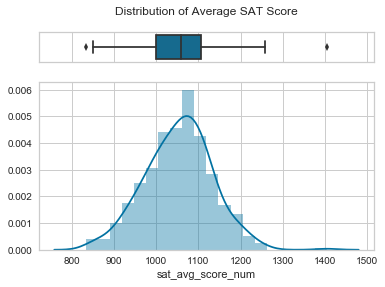

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adapted from https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part

box = sns.boxplot(hs_2017["sat_avg_score_num"], ax=ax_box)
dist = sns.distplot(hs_2017["sat_avg_score_num"], ax=ax_hist)

box.set_title("Distribution of Average SAT Score\n")

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.show()

In [8]:
hs_2017.describe()

,student_num,lea_avg_student_num,st_avg_student_num,09_Size,10_Size,11_Size,12_Size,Biology_Size,English II_Size,Math I_Size,...,SRC_Grades_Devices_Sent_Home_10:11:12:13,SRC_Grades_Devices_Sent_Home_6:07:08,SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12,SRC_Grades_Devices_Sent_Home_8:9:10:11:12:13,SRC_Grades_Devices_Sent_Home_9:10,SRC_Grades_Devices_Sent_Home_9:10:11,SRC_Grades_Devices_Sent_Home_9:10:11:12,SRC_Grades_Devices_Sent_Home_9:10:11:12:13,unit_code,sat_avg_level
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,...,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,908.121140,845.624703,838.653207,19.066508,18.615202,18.555819,17.228029,18.866983,19.866983,18.612827,...,0.004751,0.004751,0.002375,0.002375,0.002375,0.016627,0.273159,0.059382,513395.256532,0.377672
std,579.128176,346.789646,84.135171,6.847338,7.723135,7.720403,8.246804,4.960931,4.864975,4.992826,...,0.068842,0.068842,0.048737,0.048737,0.048737,0.128022,0.446112,0.236620,281496.468476,0.485382
min,67.000000,164.000000,278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10303.000000,0.000000
25%,426.000000,617.000000,853.000000,17.000000,17.000000,16.000000,15.000000,16.000000,17.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,280316.000000,0.000000
50%,828.000000,815.000000,853.000000,20.000000,20.000000,21.000000,19.000000,19.000000,20.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,491312.000000,0.000000
75%,1250.000000,974.000000,853.000000,23.000000,23.000000,24.000000,23.000000,22.000000,23.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,780325.000000,1.000000
max,2966.000000,1852.000000,853.000000,33.000000,52.000000,30.000000,36.000000,30.000000,30.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,995330.000000,1.000000


# Section 3: Data Understanding 2
It is important to understand the relationships between individual predictors and our variable of interest. In this section we will explore how the derived SAT Level under/overperform (0/1) compare to other attributes of interest. 

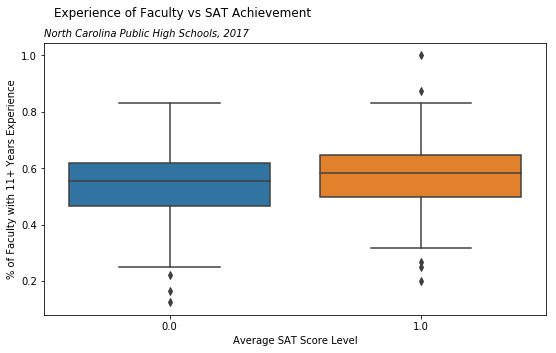

In [10]:
vars = ['tchyrs_11plus_pct', 'sat_avg_level']
df = hs_2017[vars]
fig, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(data=df, x = 'sat_avg_level', y = 'tchyrs_11plus_pct')
plt.xlabel("Average SAT Score Level")
plt.ylabel("% of Faculty with 11+ Years Experience")
plt.suptitle('Experience of Faculty vs SAT Achievement', x = .338)
plt.title('North Carolina Public High Schools, 2017', size=10, loc='left', style = 'italic')
plt.show()

One thing that is *immediately* obvious from this plot is that schools with low average SAT achievement have a notable lack of highly experienced teachers. It remains to be seen how statistically or practically significant the effect may be, but this is a valuable insight to keep in mind throughout the analysis. 

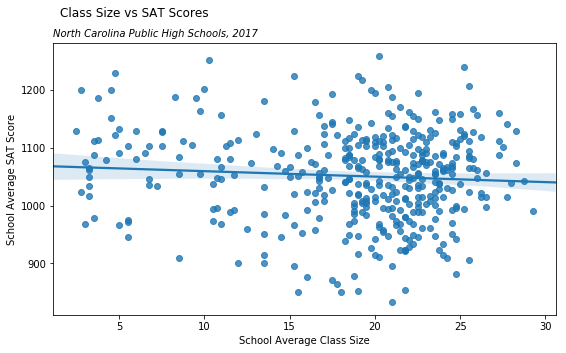

In [11]:
vars = ['09_Size', '10_Size', '11_Size', '12_Size']# 'sat_avg_score_num']
avg_sizes = hs_2017[vars].mean(axis=1)
scores = hs_2017.sat_avg_score_num
df = pd.concat([avg_sizes, scores], axis=1)
df = df[(df != 0).all(1)]
df.columns = ['Average Class Size', 'Average SAT Scores']
fig, ax = plt.subplots(figsize=(9, 5))
sns.regplot(x='Average Class Size', y = 'Average SAT Scores', data = df)
plt.xlabel("School Average Class Size")
plt.ylabel("School Average SAT Score")
plt.suptitle('Class Size vs SAT Scores', x = .25)
plt.title('North Carolina Public High Schools, 2017', size=10, loc='left', style = 'italic')
plt.show()

In the above scatterplot we can see a weak negative correlation between the average class size and SAT score in a given school. While class size in it of itself may not be a strong predictor of SAT scores, perhaps when combined with other variables it will provide more predictive value than the above implies.


The below strip plot illustrates the negative correlation between SAT score and the school's percentage of economically disadvantaged students. Higher SAT scores appear to be associated with lower percentages of economically disadvantaged students.

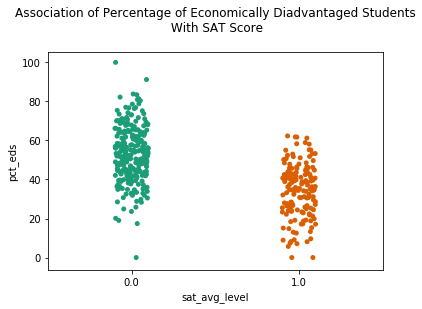

In [13]:
sat_eds = sns.stripplot(x="sat_avg_level", y="pct_eds",jitter=True, data=hs_2017, palette="Dark2")
sat_eds.set_title("Association of Percentage of Economically Diadvantaged Students\n With SAT Score\n")
plt.show()

These box plots illustrate the positive correlation and fairly normal distribution of SPG Score with SAT level. Schools with the highest school performance grade tend to have higher SAT scores.

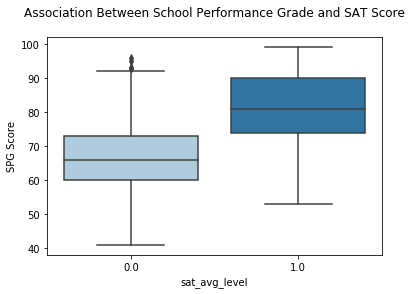

In [15]:
sat_SPG = sns.boxplot(x="sat_avg_level", y="SPG Score",  data=hs_2017, palette="Paired")
sat_SPG.set_title("Association Between School Performance Grade and SAT Score\n")
plt.show()

These violin plots show the positive correlation between SAT score and all EOC subjects for College and Career Ready students. Although there are some regions of overlap, the violin plot is well-suited to illustrate that the bulk of higher SAT scores are associated with higher EOC scores, as are lower SAT scores with lower EOC scores. Schools with medium-range SAT scores are likewise associated with mid-range EOC scores.

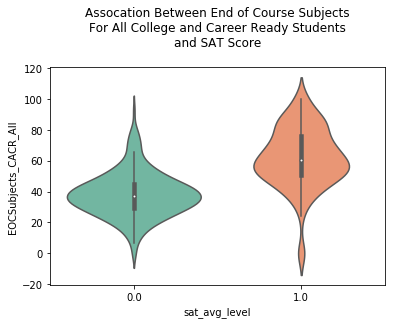

In [17]:
sat_eoc_cacr = sns.violinplot(x="sat_avg_level", y="EOCSubjects_CACR_All", data=hs_2017, palette="Set2")
sat_eoc_cacr.set_title("Assocation Between End of Course Subjects\nFor All College and Career Ready Students\nand SAT Score\n")
plt.show()

The correlogram below illustrates, via scatter plot matrix, the correlation between *Gr_9_Pct_Prof*, *pct_eds*, *SPG Score*, and *EOCSubjects_CACR_All* with average SAT score. SAT score is positively correlated with 9th grade proficiency, school performance grade, and EOC subject grades with college and career ready students. SAT score is negatively correlated with the percentage of economically disadvantaged students.

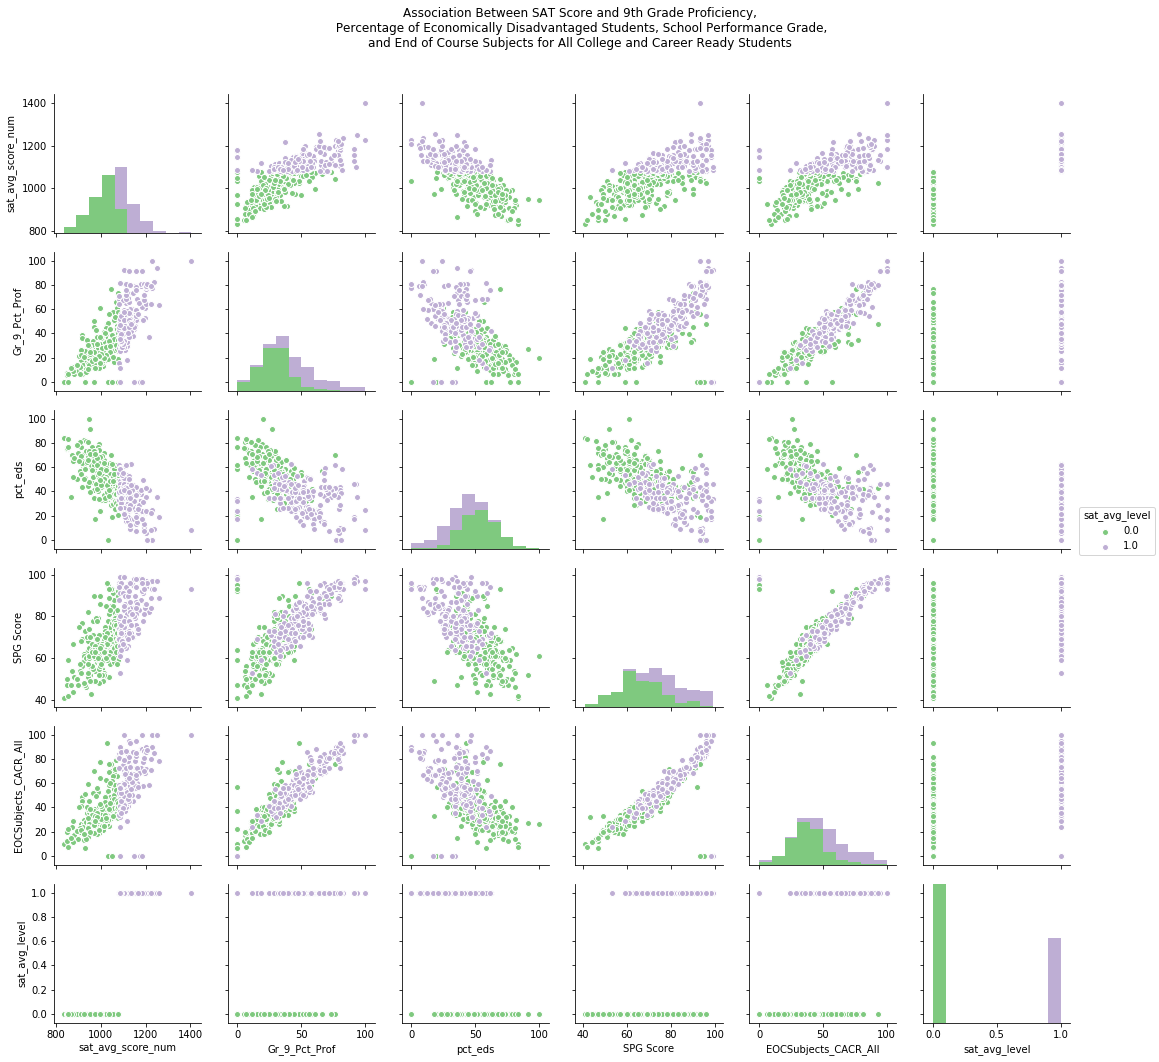

In [19]:
df = hs_2017[['sat_avg_score_num','Gr_9_Pct_Prof','pct_eds','SPG Score','EOCSubjects_CACR_All','sat_avg_level']]

# Basic correlogram
sat_pairplot1 = sns.pairplot(df, hue="sat_avg_level", palette="Accent")
plt.subplots_adjust(top=0.9)
sat_pairplot1.fig.suptitle("Association Between SAT Score and 9th Grade Proficiency,\n Percentage of Economically Disadvantaged Students, School Performance Grade,\nand End of Course Subjects for All College and Career Ready Students\n")

plt.show()

The following correlogram illustrates, via scatter plot matrix, the correlation between *EOCEnglish2_CACR_Female*, *BlackPct*, *short_susp_per_c_num*, and *flicensed_teach_pct* with average SAT score. SAT score is positively associated with English 2 end of course scores among college and career ready females, as well as the percentage of fully licensed teachers. SAT scores are negatively correlated with the percentage of student demographics identifying as Black/African American, as well as the number of short-term suspensions per 100 students.

Note that the correlation, as identified above with Pearson's *r* coefficients, is not as strong in this subset of attributes as in the previous subset.

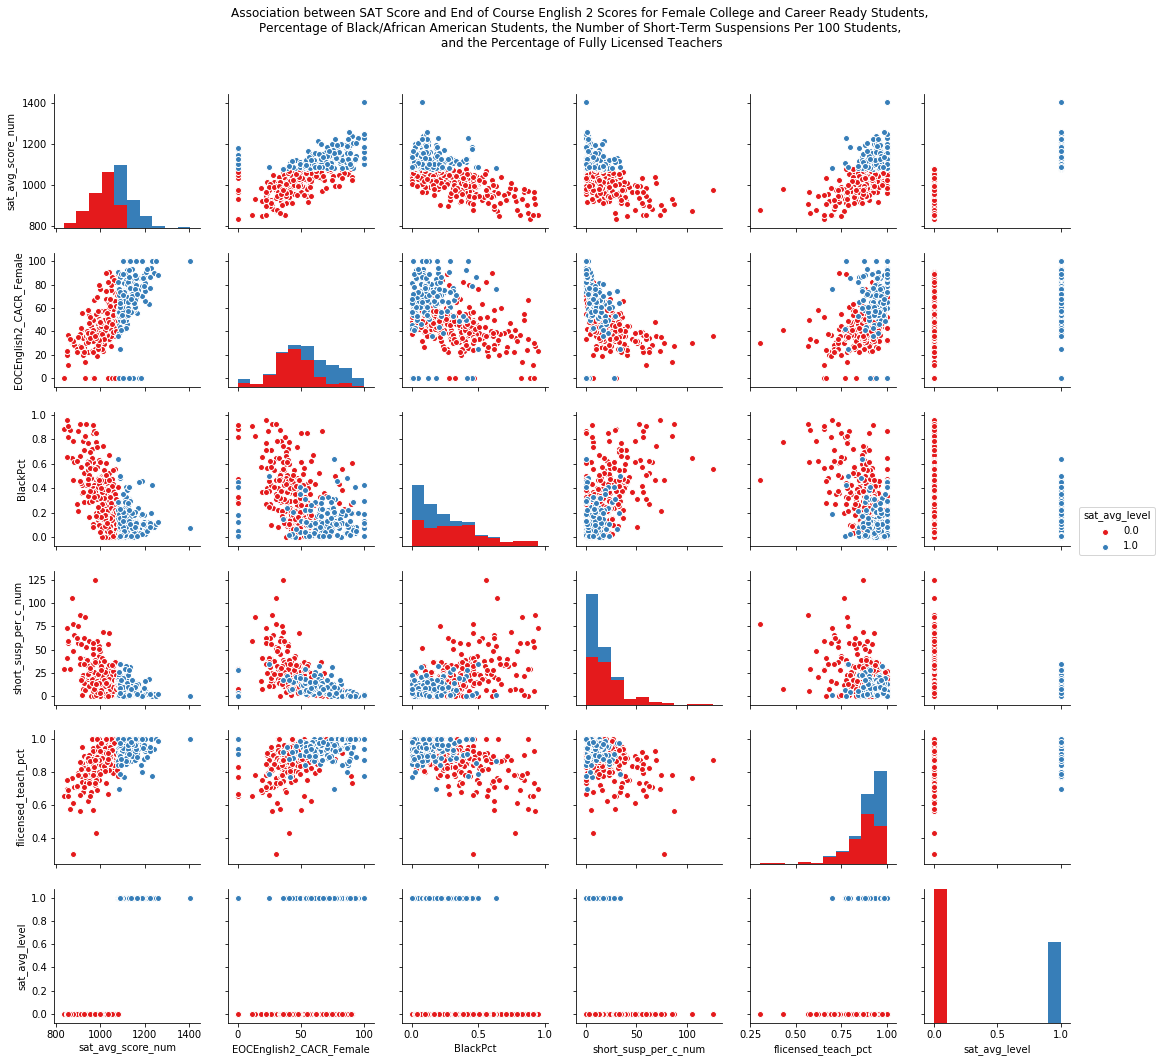

In [20]:
df2 = hs_2017[['sat_avg_score_num','EOCEnglish2_CACR_Female','BlackPct','short_susp_per_c_num','flicensed_teach_pct','sat_avg_level']]
# Basic correlogram

sat_pairplot2=sns.pairplot(df2,hue="sat_avg_level", palette="Set1")
plt.subplots_adjust(top=0.9)
sat_pairplot2.fig.suptitle("Association between SAT Score and End of Course English 2 Scores for Female College and Career Ready Students,\nPercentage of Black/African American Students, the Number of Short-Term Suspensions Per 100 Students,\n and the Percentage of Fully Licensed Teachers\n")
plt.show()

The following correlogram illustrates, via scatter plot matrix, the correlation between *EOCMathI_CACR_Male*, *MinorityPct*, *lateral_teach_pct*, and *EOCEnglish2_CACR_Male* with average SAT score. SAT score is positively associated with Math 1 end of course scores among college and career ready males, as well as with English 2 end of course scores among college and career ready males. SAT scores are negatively correlated with the percentage of student demographics identifying as members of a minority, as well as the lateral entry teacher percentage at the school level.

Note that the correlation, as identified above with Pearson's *r* coefficients, is not as strong in this subset of attributes as in the previous two subsets.

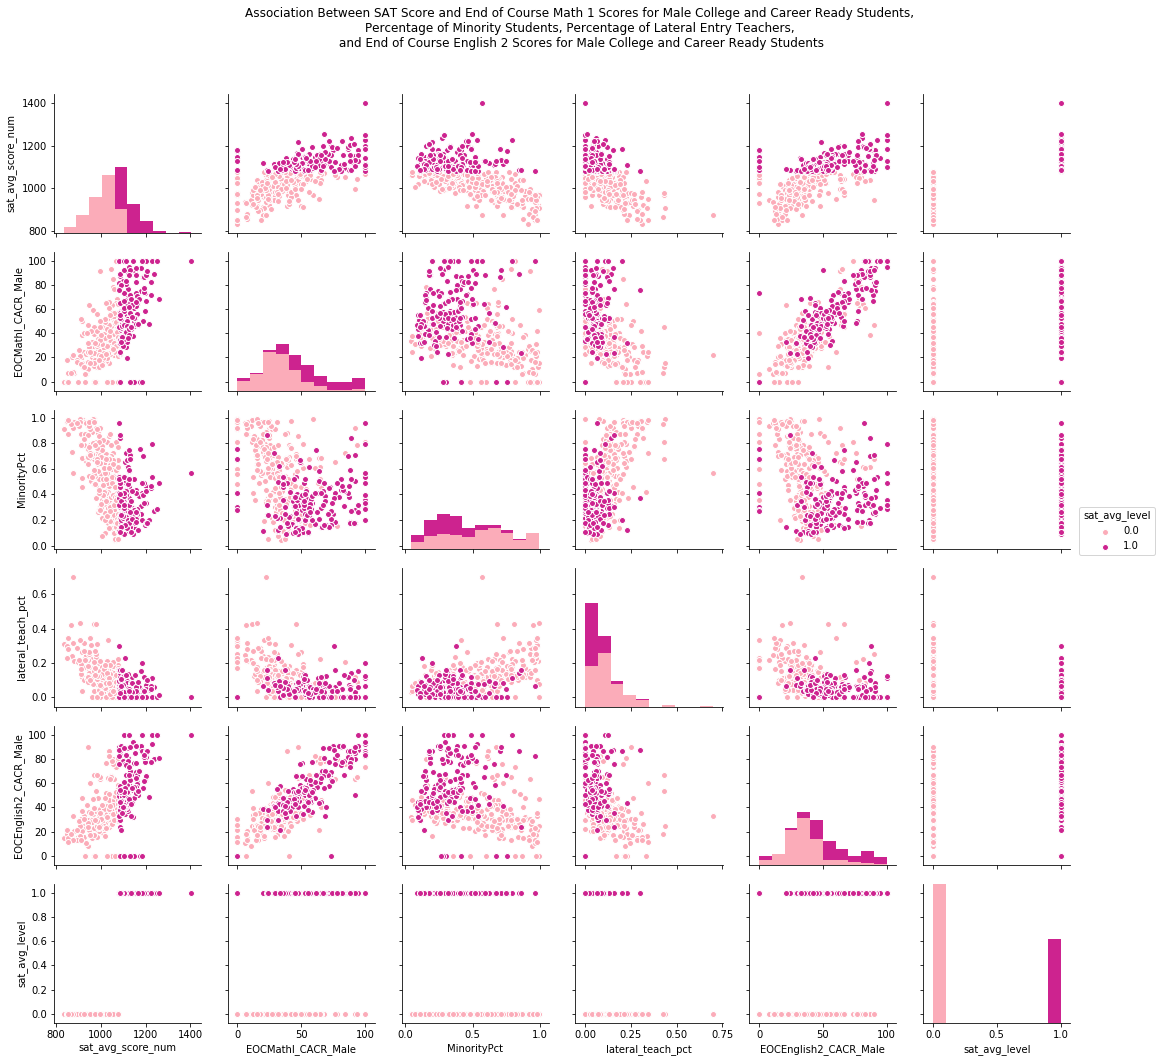

In [24]:
df3 = hs_2017[['sat_avg_score_num','EOCMathI_CACR_Male','MinorityPct','lateral_teach_pct','EOCEnglish2_CACR_Male','sat_avg_level']]
# Basic correlogram

sat_pairplot3=sns.pairplot(df3,hue="sat_avg_level", palette="RdPu")
plt.subplots_adjust(top=0.9)
sat_pairplot3.fig.suptitle("Association Between SAT Score and End of Course Math 1 Scores for Male College and Career Ready Students,\nPercentage of Minority Students, Percentage of Lateral Entry Teachers,\n and End of Course English 2 Scores for Male College and Career Ready Students\n")
plt.show()

# Modeling and Evaluation 1 & 2: Training & Evaluation

In this report, we will be exploring what we can learn about our dataset using cluster analysis techniques. Cluster analysis is the idea of finding ways to group observations into sets so that the members of each group are more similar to each other than to members of other groups. Based on that definition, cluster analysis if more of a field or problem space than a particular technique or algorithm. For this reason, we'll be exploring multiple clustering techniques. On one hand, we would like to see our data naturally cluster into two groups to correspond with our target variable of over and under-performing on the SAT. Clustering on real data, "in the wild" is rarely such a clean exercise, and so if we can't find natural clusters that match our target variable, we will at least try to optimize our clusters' similarity, and use those cluster labels to enhance our classification capabilities.

At a very high level there are two general types of clustering: divisive and agglomerative. In divisive clustering techniques, we imagine the entire dataset as a single cluster at first, and look to break it apart into clusters of observations that are more similar to each other than they are to obvservations in other clusters. In this sense we divide one initial cluster into smaller and smaller clusters until we hit some sort of stopping point, depending on the algorithm. Agglomerative clustering is the opposite, as we start with all the individual points and accumulate them into larger and larger clusters until hitting some sort of stopping point.

The first clustering technique we'll use with our data is K-Means clustering, which is a type of divisive clustering. The goal of K-means clustering is to generate groups such that each member of the group is closer to the mean of that group than any other group's mean. This sounds a little confusing at first, but visualizing this concept makes it become very intuitive, and aesthetically pleasing to boot! Below is the classical example of what's known as Voronoi cells, wherein each cell is defined as the set of points that are closer to the center of gravity (big black point) than any other. 

<p><a href="https://commons.wikimedia.org/wiki/File:Euclidean_Voronoi_diagram.svg#/media/File:Euclidean_Voronoi_diagram.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Euclidean_Voronoi_diagram.svg/1200px-Euclidean_Voronoi_diagram.svg.png" alt="Euclidean Voronoi diagram.svg" width=400px></a><br>By <a href="//commons.wikimedia.org/wiki/User:Balu.ertl" title="User:Balu.ertl">Balu Ertl</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=38534275">Link</a></p>

With this visual understanding of K-means in hand, we recognize there is one parameter available for tuning this model, and that is the number of clusters to use. Once clusters are found, there are a few ways of measuring how "good" they are. We'll look at the following two metrics.

    * Distortion: The mean sum of squared distance for each point to it's nearest centroid
    * Silhouette: The mean ratio of within-cluster and nearest-cluster distance
    
An important caveat to our use of K-means here is that euclidean distance can be a problematic metric in high-dimensional space. This discussion https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions provides an excellent reference for why that is the case. 

In [7]:
# Preparing the Classification variables
Y_class = hs_2017['sat_avg_level']
# We drop the SAT related variables
X_class = hs_2017.drop(columns=['sat_avg_level', 'sat_avg_score_num'])

from sklearn.preprocessing import StandardScaler

# Standardize the data to a more normally distributed data
scaler_class = StandardScaler()
scaler_class.fit(X_class)

from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate a 90/10 training/test split of data, we'll use the holdout 10% to get a sense for our out of
# sample error once we have decided on a model
X_train, X_test, y_train, y_test = train_test_split(X_class, Y_class, test_size=0.1, random_state=0)

# Generate & train instance of RandomForest classifier to use as classification baseline
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

cv_class = StratifiedShuffleSplit(n_splits=10, test_size=0.10, random_state=0)

clf = rf

# Run KMeans with default parameters
cls = KMeans(random_state=1)
cls.fit(X_train)

newfeature = cls.labels_ 

X = np.column_stack((X_train, pd.get_dummies(newfeature)))

acc = cross_validate(clf, X, y = y_train, cv = cv_class, scoring= ('accuracy', 'precision', 'recall'))
print ("Average accuracy (with default kmeans) = ", acc['test_accuracy'].mean()*100, "+-", acc['test_accuracy'].std()*100)
print ("Average precision (with default kmeans) = ", acc['test_precision'].mean()*100, "+-", acc['test_precision'].std()*100)
print ("Average recall (with default kmeans) = ", acc['test_recall'].mean()*100, "+-", acc['test_recall'].std()*100)

Average accuracy (with default kmeans) =  83.68421052631578 +- 4.677997061745046
Average precision (with default kmeans) =  84.16691641691642 +- 9.70096639288269
Average recall (with default kmeans) =  70.71428571428571 +- 12.14285714285714


Let's see if we can improve upon accuracy and/or standard deviation.  

First we will look at the silhouette score as we use different cluster sizes. We'll use two different visualizations to see this effect. Reminder that the silhouette score goes from 1 to -1, with 1 being the best score and -1 being worst.

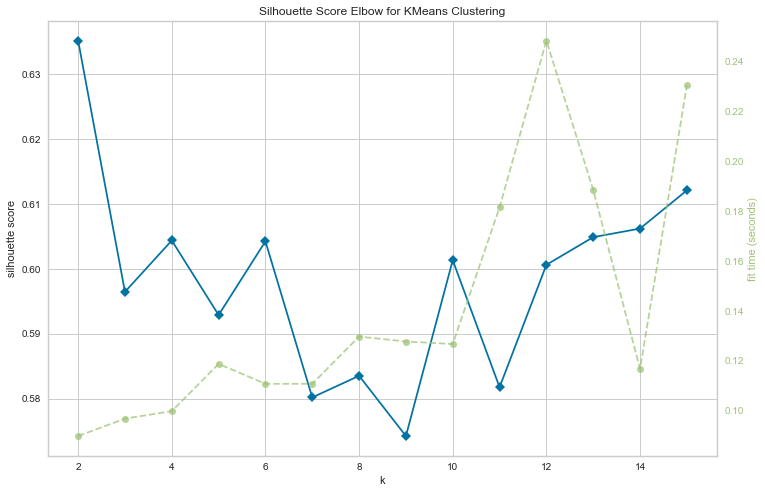

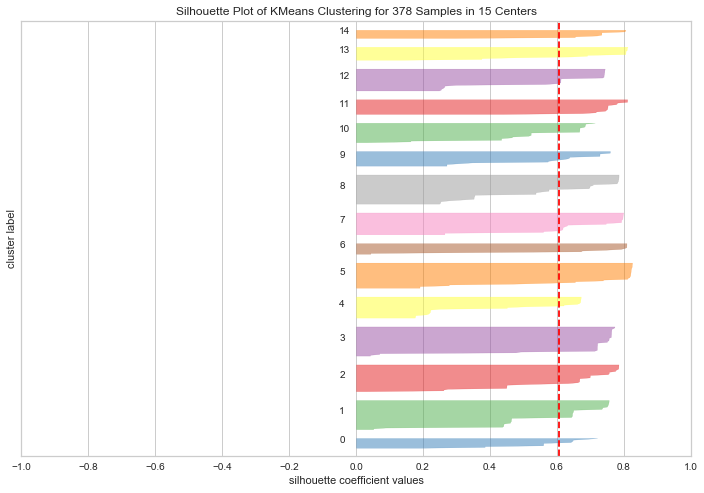

2 Cluster KMeans average accuracy =  86.57894736842104 +- 5.576215815899232
2 Cluster KMeans average precision =  87.41758241758241 +- 10.796248906916205
2 Cluster KMeans average recall =  75.71428571428571 +- 10.20204061220407
2 Cluster KMeans average silhouette score =  0.6351510294016998
Wall time: 3.11 s


In [15]:
%%time
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn import metrics

newdims = (12, 8)
fig, ax = pyplot.subplots(figsize=newdims)


# Instantiate the clustering model and visualizer
sil_elb = KElbowVisualizer(KMeans(), k=15, metric='silhouette', random_state=1) 
sil_elb.fit(X_train, random_state=1)
sil_elb.poof()


newdims = (12, 8)
fig, ax = pyplot.subplots(figsize=newdims)

silviz = SilhouetteVisualizer(KMeans(n_clusters=15))
silviz.fit(X) # Fit the training data to the visualizer
silviz.poof() # Draw/show/poof the data

n_clust = sil_elb.k_values_[np.argmax(sil_elb.k_scores_)]
cls = KMeans(n_clusters=n_clust, init='k-means++', n_init=10, random_state=1)
cls.fit(X_train)
newfeature = cls.labels_ 
X = np.column_stack((X_train, pd.get_dummies(newfeature)))
acc = cross_validate(clf, X, y = y_train, cv = cv_class, scoring= ('accuracy', 'precision', 'recall'))
print (n_clust, "Cluster KMeans average accuracy = ", acc['test_accuracy'].mean()*100, "+-", acc['test_accuracy'].std()*100)
print (n_clust, "Cluster KMeans average precision = ", acc['test_precision'].mean()*100, "+-", acc['test_precision'].std()*100)
print (n_clust, "Cluster KMeans average recall = ", acc['test_recall'].mean()*100, "+-", acc['test_recall'].std()*100)
print (n_clust, "Cluster KMeans average silhouette score = ", metrics.silhouette_score(X,newfeature,metric='euclidean'))

Both of the above plots show a high silhouette score at k = 2 clusters.  If we incorporate those labels into our original classifier model, we increase precision by a few percentage points.

Next we will do the the elbow method approach using distortion as our metric of interest.

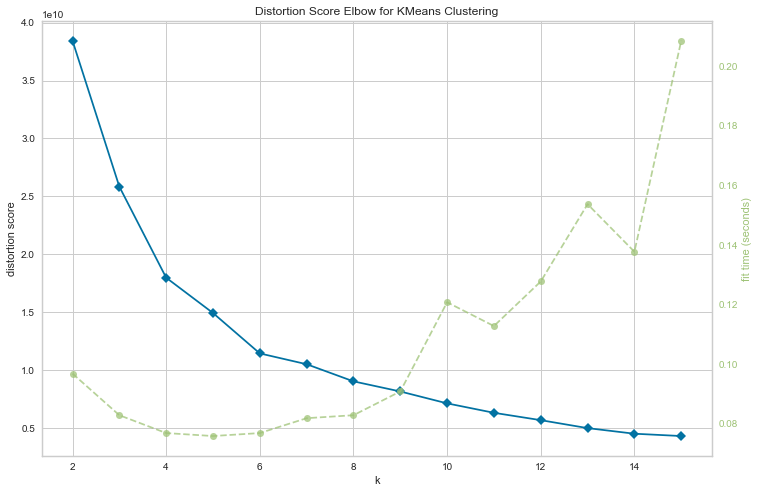

15 Cluster KMeans average accuracy =  86.31578947368419 +- 6.205171643448207
15 Cluster KMeans average precision =  85.80569430569429 +- 12.2419996797914
15 Cluster KMeans average recall =  77.14285714285714 +- 9.999999999999998
Wall time: 2.47 s


In [16]:
%%time
newdims = (12, 8)
fig, ax = pyplot.subplots(figsize=newdims)
dist_elb = KElbowVisualizer(KMeans(), k=15, metric='distortion') 
dist_elb.fit(X_train)
dist_elb.poof()

n_clust = dist_elb.k_values_[np.argmin(dist_elb.k_scores_)]
cls = KMeans(n_clusters=n_clust, init='k-means++', n_init=10, random_state=1)
cls.fit(X_train)
newfeature = cls.labels_ 
X = np.column_stack((X_train, pd.get_dummies(newfeature)))
acc = cross_validate(clf, X, y = y_train, cv = cv_class, scoring= ('accuracy', 'precision', 'recall'))
print (n_clust, "Cluster KMeans average accuracy = ", acc['test_accuracy'].mean()*100, "+-", acc['test_accuracy'].std()*100)
print (n_clust, "Cluster KMeans average precision = ", acc['test_precision'].mean()*100, "+-", acc['test_precision'].std()*100)
print (n_clust, "Cluster KMeans average recall = ", acc['test_recall'].mean()*100, "+-", acc['test_recall'].std()*100)

This elbow plot doesn't have much of an elbow at all. The smooth downward curve typically indicates that our data doesn't cluster well based on distortion. Distortion is a pure euclidean distance related metric so it isn't too surprising it doesn't work well with our high dimensional data.

The next clustering technique we will work with is HDBSCAN, which is a hierarchical extension of DBSCAN, a density-based clustering method, in constrast to K-means as a distance based method. The details of HDBSCAN aren't as intuitive as those of K-means, but a great resource for digging into the algorithm is located here: http://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html. There are 2 primary parameters available for tuning in HDBSCAN.

    * Minimum Cluster Size: This is the smallest number of observations you wish to consider a cluster
    * Minimum Samples: This drives how conservative the clustering is: the higher the value, the more conservative the algorithm will be

In [17]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=15).fit(X_train)
newfeature = clusterer.labels_ 
X = np.column_stack((X_train, pd.get_dummies(newfeature)))
acc = cross_validate(clf, X, y = y_train, cv = cv_class, scoring= ('accuracy', 'precision', 'recall'))
print ("This algorithm found ", max(newfeature)-1, " clusters")
print ("HDBSCAN with min_cluster_size = 15 average accuracy = ", acc['test_accuracy'].mean()*100, "+-", acc['test_accuracy'].std()*100)
print ("HDBSCAN with min_cluster_size = 15 average precision = ", acc['test_precision'].mean()*100, "+-", acc['test_precision'].std()*100)
print ("HDBSCAN with min_cluster_size = 15 average recall = ", acc['test_recall'].mean()*100, "+-", acc['test_recall'].std()*100)

This algorithm found  7  clusters
HDBSCAN with min_cluster_size = 15 average accuracy =  87.89473684210527 +- 8.085416576703796
HDBSCAN with min_cluster_size = 15 average precision =  87.28011204481791 +- 14.13992423373886
HDBSCAN with min_cluster_size = 15 average recall =  80.71428571428572 +- 11.088696211614304


In [19]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=15).fit(X_train)
newfeature = clusterer.labels_ 
X = np.column_stack((X_train, pd.get_dummies(newfeature)))
acc = cross_validate(clf, X, y = y_train, cv = cv_class, scoring= ('accuracy', 'precision', 'recall'))
print ("This algorithm found ", max(newfeature)-1, " clusters")
print ("HDBSCAN with min_cluster_size = 30 average accuracy = ", acc['test_accuracy'].mean()*100, "+-", acc['test_accuracy'].std()*100)
print ("HDBSCAN with min_cluster_size = 30 average precision = ", acc['test_precision'].mean()*100, "+-", acc['test_precision'].std()*100)
print ("HDBSCAN with min_cluster_size = 30 average recall = ", acc['test_recall'].mean()*100, "+-", acc['test_recall'].std()*100)

This algorithm found  2  clusters
HDBSCAN with min_cluster_size = 30 average accuracy =  87.63157894736842 +- 7.35430979604322
HDBSCAN with min_cluster_size = 30 average precision =  85.69368131868131 +- 12.076625955911476
HDBSCAN with min_cluster_size = 30 average recall =  81.42857142857143 +- 11.157499537009507


Using a min_cluster_size of 30 resulted in our desired two clusters. It increased precision relative to our baseline but not relative to our K-means model.

The next clustering algorithm we will use is agglomerative clustering.

In [24]:
from sklearn import cluster

clusterer = cluster.AgglomerativeClustering(n_clusters = 2, affinity='euclidean').fit(X_train)
newfeature = clusterer.labels_ 
X = np.column_stack((X_train, pd.get_dummies(newfeature)))
acc = cross_validate(clf, X, y = y_train, cv = cv_class, scoring= ('accuracy', 'precision', 'recall'))
print ("2 Agg Euc Cluster average accuracy = ", acc['test_accuracy'].mean()*100, "+-", acc['test_accuracy'].std()*100)
print ("2 Agg Euc Cluster erage precision = ", acc['test_precision'].mean()*100, "+-", acc['test_precision'].std()*100)
print ("2 Agg Euc Cluster average recall = ", acc['test_recall'].mean()*100, "+-", acc['test_recall'].std()*100)
clusterer = cluster.AgglomerativeClustering(n_clusters = 2, affinity='cosine', linkage='complete').fit(X_train)
newfeature = clusterer.labels_ 
X = np.column_stack((X_train, pd.get_dummies(newfeature)))
acc = cross_validate(clf, X, y = y_train, cv = cv_class, scoring= ('accuracy', 'precision', 'recall'))
print ("2 Agg Cosine Cluster average accuracy = ", acc['test_accuracy'].mean()*100, "+-", acc['test_accuracy'].std()*100)
print ("2 Agg Cosine Cluster erage precision = ", acc['test_precision'].mean()*100, "+-", acc['test_precision'].std()*100)
print ("2 Agg Cosine Cluster average recall = ", acc['test_recall'].mean()*100, "+-", acc['test_recall'].std()*100)
print(85*"-")
clusterer = cluster.AgglomerativeClustering(n_clusters = 5, affinity='euclidean').fit(X_train)
newfeature = clusterer.labels_ 
X = np.column_stack((X_train, pd.get_dummies(newfeature)))
acc = cross_validate(clf, X, y = y_train, cv = cv_class, scoring= ('accuracy', 'precision', 'recall'))
print ("5 Agg Euc Cluster average accuracy = ", acc['test_accuracy'].mean()*100, "+-", acc['test_accuracy'].std()*100)
print ("5 Agg Euc Cluster erage precision = ", acc['test_precision'].mean()*100, "+-", acc['test_precision'].std()*100)
print ("5 Agg Euc Cluster average recall = ", acc['test_recall'].mean()*100, "+-", acc['test_recall'].std()*100)
clusterer = cluster.AgglomerativeClustering(n_clusters = 5, affinity='cosine', linkage='complete').fit(X_train)
newfeature = clusterer.labels_ 
X = np.column_stack((X_train, pd.get_dummies(newfeature)))
acc = cross_validate(clf, X, y = y_train, cv = cv_class, scoring= ('accuracy', 'precision', 'recall'))
print ("5 Agg Cosine Cluster average accuracy = ", acc['test_accuracy'].mean()*100, "+-", acc['test_accuracy'].std()*100)
print ("5 Agg Cosine Cluster erage precision = ", acc['test_precision'].mean()*100, "+-", acc['test_precision'].std()*100)
print ("5 Agg Cosine Cluster average recall = ", acc['test_recall'].mean()*100, "+-", acc['test_recall'].std()*100)
print(85*"-")
clusterer = cluster.AgglomerativeClustering(n_clusters = 7, affinity='euclidean').fit(X_train)
newfeature = clusterer.labels_ 
X = np.column_stack((X_train, pd.get_dummies(newfeature)))
acc = cross_validate(clf, X, y = y_train, cv = cv_class, scoring= ('accuracy', 'precision', 'recall'))
print ("7 Agg Euc Cluster average accuracy = ", acc['test_accuracy'].mean()*100, "+-", acc['test_accuracy'].std()*100)
print ("7 Agg Euc Cluster erage precision = ", acc['test_precision'].mean()*100, "+-", acc['test_precision'].std()*100)
print ("7 Agg Euc Cluster average recall = ", acc['test_recall'].mean()*100, "+-", acc['test_recall'].std()*100)
clusterer = cluster.AgglomerativeClustering(n_clusters = 7, affinity='cosine', linkage='complete').fit(X_train)
newfeature = clusterer.labels_ 
X = np.column_stack((X_train, pd.get_dummies(newfeature)))
acc = cross_validate(clf, X, y = y_train, cv = cv_class, scoring= ('accuracy', 'precision', 'recall'))
print ("7 Agg Cosine Cluster average accuracy = ", acc['test_accuracy'].mean()*100, "+-", acc['test_accuracy'].std()*100)
print ("7 Agg Cosine Cluster erage precision = ", acc['test_precision'].mean()*100, "+-", acc['test_precision'].std()*100)
print ("7 Agg Cosine Cluster average recall = ", acc['test_recall'].mean()*100, "+-", acc['test_recall'].std()*100)

2 Agg Euc Cluster average accuracy =  86.57894736842104 +- 5.576215815899232
2 Agg Euc Cluster erage precision =  87.41758241758241 +- 10.796248906916205
2 Agg Euc Cluster average recall =  75.71428571428571 +- 10.20204061220407
2 Agg Cosine Cluster average accuracy =  87.10526315789474 +- 6.704073264661576
2 Agg Cosine Cluster erage precision =  86.38933615404204 +- 12.492014101738123
2 Agg Cosine Cluster average recall =  79.28571428571428 +- 9.285714285714285
-------------------------------------------------------------------------------------
5 Agg Euc Cluster average accuracy =  86.8421052631579 +- 6.0009232899954625
5 Agg Euc Cluster erage precision =  84.7143665158371 +- 11.705141398516709
5 Agg Euc Cluster average recall =  80.71428571428572 +- 10.126747770541304
5 Agg Cosine Cluster average accuracy =  86.31578947368422 +- 6.31578947368421
5 Agg Cosine Cluster erage precision =  84.74824929971989 +- 12.512002810338817
5 Agg Cosine Cluster average recall =  80.0 +- 14.214106244

Looking through the above results, it appears that using Euclidean distance and two clusters gives us the best classification results when looking at agglomerative clustering. In the next section we will visualize the actual clusters being selected by these various algorithms.

# Modeling and Evaluation 3: Visualize

In this section we will visualize the clustering results from the models explored above. We will use a technique called T-SNE to generate a 2 dimensional representation of our dataset, in order to have a more intuitive understanding of how the clustering looks.

First let's look at an un-clustered version of this 2D projection.

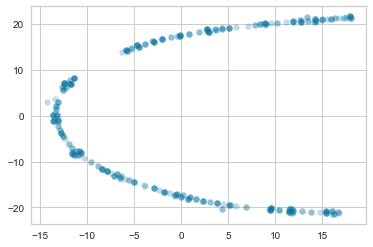

In [28]:
from sklearn.manifold import TSNE
import sklearn.cluster as cluster

plot_kwds = {'alpha' : 0.25, 's' : 40, 'linewidths':0}
projection = TSNE().fit_transform(X_train)
plt.scatter(*projection.T, **plot_kwds)
plt.show()

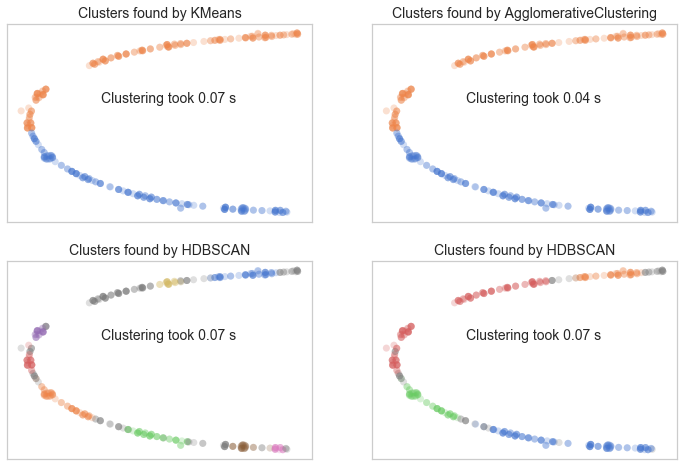

In [29]:
import time
# This function will run a given clustering algorithm and plot the clusters on the same 2D  TSNE projection as above
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('muted', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (.5, .5, .5) for x in labels]
    plt.scatter(*projection.T, s=50, linewidth=0, c=colors, alpha=0.25)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=14)
    plt.text(-5, 5, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    


plt.subplots(2, 2, figsize=newdims)
plt.subplot(2, 2, 1)
plot_clusters(X_train, cluster.KMeans, (), {'n_clusters':2})
plt.subplot(2, 2, 2)
plot_clusters(X_train, cluster.AgglomerativeClustering, (), {'n_clusters':2})
plt.subplot(2, 2, 3)
plot_clusters(X_train, hdbscan.HDBSCAN, (), {'min_cluster_size':15, 'min_samples':15})
plt.subplot(2, 2, 4)
plot_clusters(X_train, hdbscan.HDBSCAN, (), {'min_cluster_size':30, 'min_samples':15})

# Modeling and Evaluation 4: Summarize

Generally, clustering on such high dimensional data doesn't make for very intuitive results. In the above plot, we have projected our data onto a 2-dimensional plane, and then plotted the results of our various clustering algorithms from earlier. Each of the four results provide pretty distinctive clustering patterns. Ultimately the overarching goal of looking at this dataset has been to identify factors that contribute to a school over and under performing in SAT. From that sense, clustering doesn't seem to have added much valuable insight beyond what was discovered in earlier studies leveraging classification tools such as random forests and logistic regression.

It would have been interesting to find that our data naturally had two clusters that could be reliably tied back to our SAT achievement classes. Then we could have seen where the centroids of our clusters were, and perhaps learn something useful about overachieving or underachieving schools based on where their clusters existed in our feature space. The only times our models found two clusters are when we force it to select two clusters.


# Deployment

The models evaluated in this project would likely prove useful to policy-makers, non-profits, and businesses seeking to target low-performing schools for aid and services.  The  data used by the model is publicly available - although preprocessing is required to maximize its usefulness - and precisely classifies successful SAT schools and predicts graduation rates.  It is likely that these interested parties would also be interested in the prevalence and the specificity.  Prevalence indicates how frequently a school's overperforming actually occurs.  Specificity is how frequently the model accurately predicts an underperforming school.  Prevalence could be broken up by school district to see an overall success rate for the distict while specificity can be used to accurately show schools in need of serious help.
   
This dataset could benefit from additional data that could provide trend analysis and additional context to individual schools and school districts.  The data could be merged with previous years' data to allow for trend analysis via a time series.  This could drive predictions about whether a school can sustain the level of academic success expected or aid in detecting schools at risk.  The current dataset focuses entirely on internal school performance indicators but gives little context about external factors that may affect school performance.  Data on levels of poverty, crime, and economic indicators for the surrounding community of each school or school district could assist policy makers with targeting aid programs intended to help low-income students or where additional security funding is necessary due to high crime.
   
The model should be updated on an annual basis along with the new data that is generated for the school report cards.  This would allow for new data to be gathered by the state and analyzed, and for schools to implement changes over the course of an academic year.  Additionally, since the data is only reported on a yearly basis, any model updates generated in the interim would use the same data and likely show similar results to the prior analyses.

In order to understand the long-term effectiveness of this model as a tool, we would want to see the schools who are targeted as non-outperforming, and thus receive dollars, to increase their average SAT numeric score, and hopefully move from non-outperform to outperform.

# Exceptional Work

Throughout this paper we referenced the high dimensional nature of our dataset several times. The "curse of dimensionality" is a reference to the handful of complications that often come along with having a large number of features in your data. In this section we will pre-process our data with PCA, a dimensionality reduction technique, and then apply our clustering to some of the components found. 

As was mentioned above, Euclidean distance metrics tend to perform poorly in higher dimensional data. To that end, we decided to examine whether dimensionality reduction would improve the performance and effectiveness of our clustering analysis.  
  
Below we instantiate the same KElbowVisualizer used above to examine our silhouette score, only this time we're invoking Principle Components Analysis (PCA) to reduce our data set to 10 principle components.

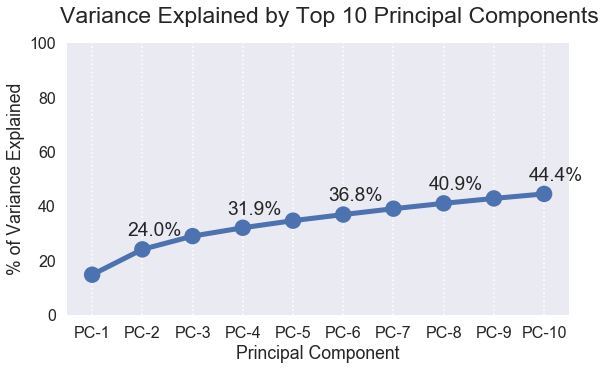

2 Cluster KMeans average accuracy =  86.57894736842104 +- 5.576215815899232
2 Cluster KMeans average precision =  87.41758241758241 +- 10.796248906916205
2 Cluster KMeans average recall =  75.71428571428571 +- 10.20204061220407
2 Cluster KMeans average silhouette score =  0.6351510294016998


In [420]:
from sklearn.decomposition import PCA
from sklearn import preprocessing


vars = ['sat_avg_level', 'sat_avg_score_num']
features = hs_2017.drop(vars, axis=1)
feats_scaled = pd.DataFrame(preprocessing.scale(features),columns = features.columns) 

# Run PCA gathering the top 10 components 
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(feats_scaled)

# Get the cumulative variance % explained by the 10 components
cum_var_exp = pca.explained_variance_ratio_.cumsum()*100

# Generate a scree plot to visualize how well the top 10 PCAs capture information
fig, ax = plt.subplots(figsize=(9, 5))
sns.pointplot(x = ['PC-'+str(i) for i in range(11)[1:12]], 
              y = cum_var_exp)
plt.ylim(0,100)
for i in range(11)[2:12:2]:
  plt.text(x = i-1.3, 
           y = round(cum_var_exp[i-1]+5,1),
           s = str(round(cum_var_exp[i-1],1)) + '%')
plt.xlabel("Principal Component")
plt.ylabel("% of Variance Explained")
plt.suptitle('Variance Explained by Top 10 Principal Components', x = .53)
plt.gca().xaxis.grid(True, linestyle='dotted')
plt.gca().yaxis.grid(False)
plt.show()

In the above chart we see that approximately 44% of the variance in our data is captured with the top 10 principal components. Now that we have reduced nearly half of our information into 10 features, let's run K-means clustering on the results.

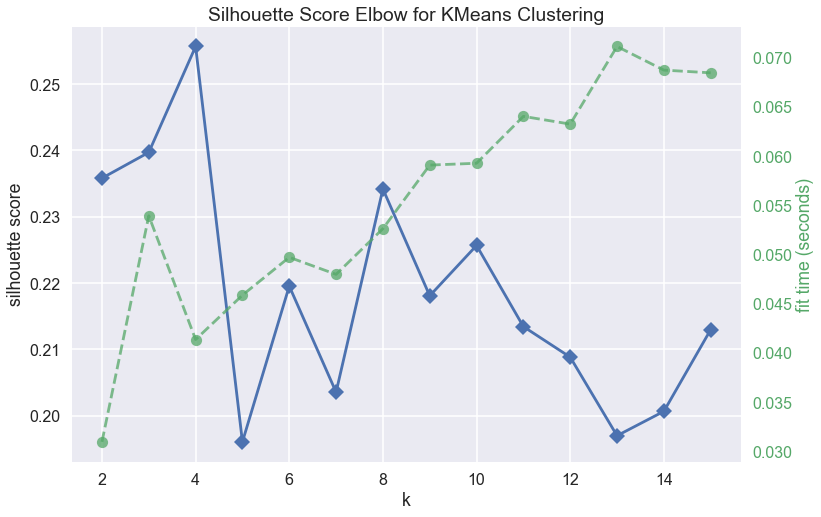

In [427]:
estimator = KMeans(n_clusters=2, init='k-means++', random_state=1, n_init=10)
estimator.fit(reduced_data)

newdims = (12, 8)
fig, ax = pyplot.subplots(figsize=newdims)
sil_elb_pca = KElbowVisualizer(estimator, k=15, metric='silhouette')
sil_elb_pca.fit(reduced_data)
sil_elb_pca.poof()


When compared to the silhouette graph in the main body of the analysis - that of the full dataset - we can see that the first several clusters have identical silhouette scores. Once the number of clusters increases past six, however, the model begins to perform much poorer. Of particular note we find that the exact same silhouette score, accuracy, and standard deviation are achieved with two clusters.
  
We can interpret the identical silhouette scores for utilizing 2-5 clusters as positive demonstration that the reduced model clusters with the same level of cohesion and separation as that of the complete dataset. Should the accuracy and standard deviation be comparable - or even identical - when explored further, this would make great strides in allowing identification of those features which contribute most highly towards the clusters themselves. By reducing the dimensionality to such an extent, one can place greater confidence in the applicability and usability of Euclidean distances and, therefore, the utility of the clustering analysis itself would increase.